- input
  - results_*/processed/
- output
  - tables/* median tables
  - tables/* final data table
  - figures/* box plots 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools  # for cycling through colors if necessary
import glob
import re
import os

In [3]:
num_models = 12 #CHANGE
device = 'cpu'
#path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # Adjust this path to your CSV files location #CHANGE
path = f"D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/" # change
#save_figs = False
SAVE_FIGS = False
SAVE_TABLES = False
UPDATE_TINY = False

In [5]:
# wattmeter: tiny -> tiny_starcoder in model, label
# nvidia: tiny -> tiny_starcoder in model, label
# energi: tiny -> tiny_starcoder in model, label

if UPDATE_TINY:
    path = f"D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/" # change
    
    #df = pd.read_csv(my_file, index_col=None, header=0)
    profilers_prefixes = ['energi', 'nvidia','wattmeter']
    prefix = profilers_prefixes[2] # change if other profiler
    
    for i in range(1,11):
        results_dir = f'results_{i}/' 
        print(f"++++++++--------------------results_dir: {results_dir}---------------------------++++++++:")
    
        os.chdir(path)
        
        #file = f'processed/{prefix}_processed_updated.csv' # CHANGE if new dataset, first: energi_processed, then energi_processed_updated
        file = f'processed/time_marks_updated.csv'
        
        print(f"reading -> {path + results_dir +file}")
        profiler_df = pd.read_csv(path + results_dir +file, index_col=None) # 
        #print(profiler_df.columns)
    
            # Function to update values based on the conditions
        
        # def update_values(value): #change this, tto tiny-starcoder
        #     if value == "tiny":
        #         return "tiny_starcoder"
        #     elif value.endswith("_tiny") and not value.startswith("tinyllama"):
        #         return value.replace("_tiny", "_tiny_starcoder")
        #     return value
        
        def update_values(value):
            if not isinstance(value,str):
                return value
            
            if value.endswith("tiny") and value.startswith("tiny"):
                return "tiny-starcoder"
            if value.endswith("tiny_starcoder") and value.startswith("tiny_starcoder"):
                return "tiny-starcoder"
            #elif value.endswith("tiny"):
            #    return "tiny-starcoder"
            elif value.endswith("_tiny_starcoder") and not value.startswith("tinyllama"):
                return value.replace("_tiny_starcoder", "_tiny-starcoder")
            elif value.endswith("_tiny_starcoder_load"):
                return value.replace("_tiny_starcoder_load", "_tiny-starcoder_load")
            elif value.endswith("_tiny_starcoder_inference"):
                return value.replace("_tiny_starcoder_inference", "_tiny-starcoder_inference")
            elif value.endswith("_tiny") and not value.endswith("_tinyllama"):
                return value.replace("_tiny", "_tiny-starcoder")
                
            return value
    
        columns_to_update = ["model", "label"]
        columns_to_update = ["model", "label", "model_name","label_time"] # in time_marks file
        
        # Apply the function to the specified columns
        for column in columns_to_update:
            try:
                profiler_df[column] = profiler_df[column].apply(update_values)
                print(f"Changed column: {column}")
            except Exception as e:
                print(f"Could not changed column: {column}, exception: {e}")
        
    
        #processed_updated_name =  f'processed/{prefix}_processed_updated.csv' #change
        processed_updated_name =  f'processed/time_marks_updated.csv'
        
        if SAVE_TABLES:
            profiler_df.to_csv(path + results_dir + processed_updated_name, index=False)
            print(f"Results saved in {path + results_dir + processed_updated_name}")
        else:
            print(f"Results NOT saved in {path + results_dir + processed_updated_name}")
    
        # check: grep -r tiny_starcoder nov_cudaep_00/results_*/processed/*updated.csv
else:
    print(f"check UPDATE_TINY: {UPDATE_TINY}")

check UPDATE_TINY: False


In [18]:
save_dir = path+"figures/"
tables_dir = path+"tables/"

try:
    os.mkdir(save_dir)
except Exception as e:
    print("could not create directory "+ save_dir )
    print(e)

try:
    os.mkdir(tables_dir)
except Exception as e:
    print("could not create directory "+ tables_dir )
    print(e)



In [6]:
def remove_condition_rows(condition_to_remove,df):
    # example: condition = merged_df['label']  == 'idle_idle'
    df1 = df.copy()
    return df1[~condition_to_remove]

In [7]:
def save_latex_table(df,save_dir):
    df = df.copy()
    df.columns = [col.replace('_', ' ') for col in df.columns]
    
    latex_table = df.to_latex(index=False)

    # Define the filename
    filename = save_dir
    
    # Open the file in write mode
    with open(filename, 'w') as file:
        file.write(latex_table) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")
        
    # Print LaTeX table
    print(latex_table)

# RQ1.1: Energy

## Profilers used metrics previsualization

### Energibridge

In [8]:
# Path where the CSV files are stored
all_files_energi = glob.glob(path + "/results_*/processed/energi_processed_updated.csv") #change
all_files_energi

['D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_1\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_10\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_2\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_3\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_4\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_5\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_6\\processed\\energi_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\resu

In [9]:
result_numbers = []

li = []
for my_file in all_files_energi:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
energi_df = pd.concat(li, axis=0, ignore_index=True)
energi_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time runtime           model  CPU_ENERGY (J)  \
0        2024-06-12 02:19:20.818    idle            idle    8.491076e+05   
1        2024-06-12 02:19:20.818    idle            idle    8.491077e+05   
2        2024-06-12 02:19:21.019    idle            idle    8.491217e+05   
3        2024-06-12 02:19:21.219    idle            idle    8.491336e+05   
4        2024-06-12 02:19:21.419    idle            idle    8.491456e+05   
...                          ...     ...             ...             ...   
4108118  2024-11-23 17:21:02.447      ov  tiny-starcoder    6.813743e+07   
4108119  2024-11-23 17:21:02.647      ov  tiny-starcoder    6.813745e+07   
4108120  2024-11-23 17:21:02.847      ov  tiny-starcoder    6.813745e+07   
4108121  2024-11-23 17:21:03.047      ov  tiny-starcoder    6.813746e+07   
4108122  2024-11-23 17:21:03.247      ov  tiny-starcoder    6.813746e+07   

         TOTAL_MEMORY  TOTAL_SWAP  USED_MEMORY  USED_SWAP  AVG_CPU_USAGE_SAMP  \
0         66575949824  2147479552   2730065920          0            6.485433   
1         66575949824  2147479552   2730582016          0            6.485433   
2         66575949824  2147479552   2799267840          0            6.403137   
3         66575949824  2147479552   2849468416          0            6.403137   
4         66575949824  2147479552   2896470016          0            5.833782   
...               ...         ...          ...        ...                 ...   
4108118   66582405120  2147479552  15479058432   76779520           48.608631   
4108119   66582405120  2147479552  15480090624   76779520           49.351896   
4108120   66582405120  2147479552  15480090624   76779520            0.751488   
4108121   66582405120  2147479552  15456993280   76779520            0.305060   
4108122   66582405120  2147479552  15437463552   76779520            0.148810   

                     label  avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  \
0                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
1                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
2                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
3                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
4                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
...                    ...               ...             ...              ...   
4108118  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108119  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108120  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108121  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108122  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   

         avg_USED_SWAP  avg_cpu_usage_config        energy  \
0                  0.0              0.147192   5513.152359   
1                  0.0              0.147192   5513.152359   
2                  0.0              0.147192   5513.152359   
3                  0.0              0.147192   5513.152359   
4                  0.0              0.147192   5513.152359   
...                ...                   ...           ...   
4108118     76779520.0             17.935921  33850.092865   
4108119     76779520.0             17.935921  33850.092865   
4108120     76779520.0             17.935921  33850.092865   
4108121     76779520.0             17.935921  33850.092865   
4108122     76779520.0             17.935921  33850.092865   

         avg_used_memory_pct_config  experiment  
0                          4.872058           1  
1                          4.872058           1  
2                          4.872058           1  
3                          4.872058           1  
4                          4.872058           1  
...                             ...         ...  
4108118                   20.019797           9  
4108119                 

In [8]:
# ## add "experiment" column 1,2...10

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_energi:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# energi_df = pd.concat(li, axis=0, ignore_index=True)
# energi_df

In [23]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [24]:
energi_df

time runtime           model  CPU_ENERGY (J)  \
0        2024-06-12 02:19:20.818    idle            idle    8.491076e+05   
1        2024-06-12 02:19:20.818    idle            idle    8.491077e+05   
2        2024-06-12 02:19:21.019    idle            idle    8.491217e+05   
3        2024-06-12 02:19:21.219    idle            idle    8.491336e+05   
4        2024-06-12 02:19:21.419    idle            idle    8.491456e+05   
...                          ...     ...             ...             ...   
4108118  2024-11-23 17:21:02.447      ov  tiny-starcoder    6.813743e+07   
4108119  2024-11-23 17:21:02.647      ov  tiny-starcoder    6.813745e+07   
4108120  2024-11-23 17:21:02.847      ov  tiny-starcoder    6.813745e+07   
4108121  2024-11-23 17:21:03.047      ov  tiny-starcoder    6.813746e+07   
4108122  2024-11-23 17:21:03.247      ov  tiny-starcoder    6.813746e+07   

         TOTAL_MEMORY  TOTAL_SWAP  USED_MEMORY  USED_SWAP  AVG_CPU_USAGE_SAMP  \
0         66575949824  2147479552   2730065920          0            6.485433   
1         66575949824  2147479552   2730582016          0            6.485433   
2         66575949824  2147479552   2799267840          0            6.403137   
3         66575949824  2147479552   2849468416          0            6.403137   
4         66575949824  2147479552   2896470016          0            5.833782   
...               ...         ...          ...        ...                 ...   
4108118   66582405120  2147479552  15479058432   76779520           48.608631   
4108119   66582405120  2147479552  15480090624   76779520           49.351896   
4108120   66582405120  2147479552  15480090624   76779520            0.751488   
4108121   66582405120  2147479552  15456993280   76779520            0.305060   
4108122   66582405120  2147479552  15437463552   76779520            0.148810   

                     label  avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  \
0                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
1                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
2                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
3                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
4                idle_idle      6.657595e+10    2.147480e+09     3.243619e+09   
...                    ...               ...             ...              ...   
4108118  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108119  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108120  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108121  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   
4108122  ov_tiny-starcoder      6.658241e+10    2.147480e+09     1.332966e+10   

         avg_USED_SWAP  avg_cpu_usage_config        energy  \
0                  0.0              0.147192   5513.152359   
1                  0.0              0.147192   5513.152359   
2                  0.0              0.147192   5513.152359   
3                  0.0              0.147192   5513.152359   
4                  0.0              0.147192   5513.152359   
...                ...                   ...           ...   
4108118     76779520.0             17.935921  33850.092865   
4108119     76779520.0             17.935921  33850.092865   
4108120     76779520.0             17.935921  33850.092865   
4108121     76779520.0             17.935921  33850.092865   
4108122     76779520.0             17.935921  33850.092865   

         avg_used_memory_pct_config  experiment  
0                          4.872058           1  
1                          4.872058           1  
2                          4.872058           1  
3                          4.872058           1  
4                          4.872058           1  
...                             ...         ...  
4108118                   20.019797           9  
4108119                 

In [25]:
# phi2 model had errors in gpu

#condition = energi_df['label'].str.endswith('phi2')

#energi_plot = remove_condition_rows( condition, energi_df)
energi_plot = energi_df

#energi_plot

In [13]:
#condition = energi_plot['label'].str.endswith('idle')

#energi_plot = remove_condition_rows( condition, energi_plot)
#energi_plot

In [14]:
#energi_plot.rename(columns={'energy': 'Energy (Energibridge) [J]'}, inplace=True)
#energi_plot.rename(columns={'AVG_CPU_USAGE_CONFIG': 'CPU usage (Energibridge) [%]'}, inplace=True)
#energi_plot.rename(columns={'avg_USED_MEMORY': 'Used memory (Energibridge) [B]'}, inplace=True)


In [26]:
energi_plot.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

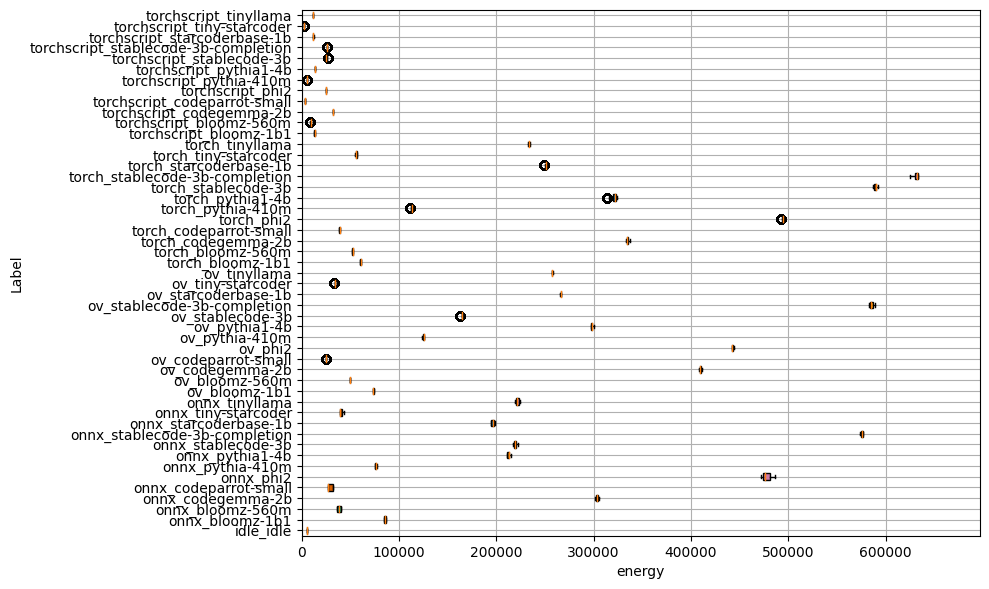

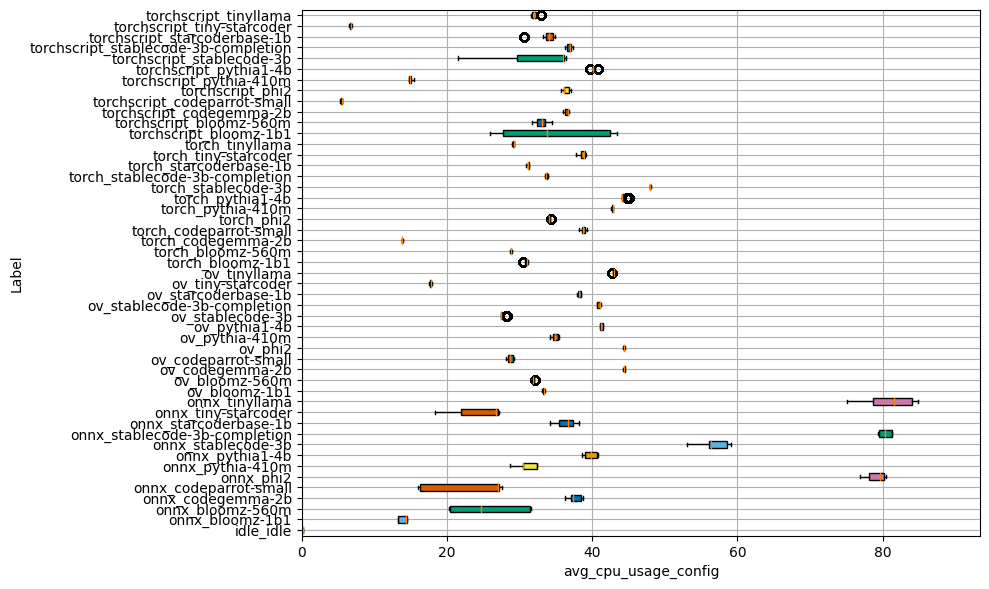

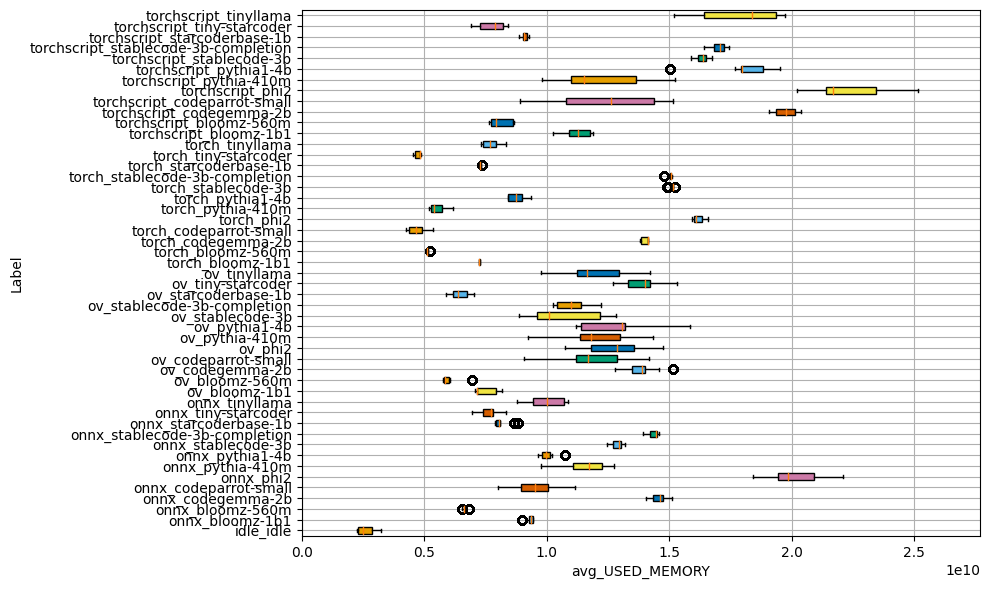

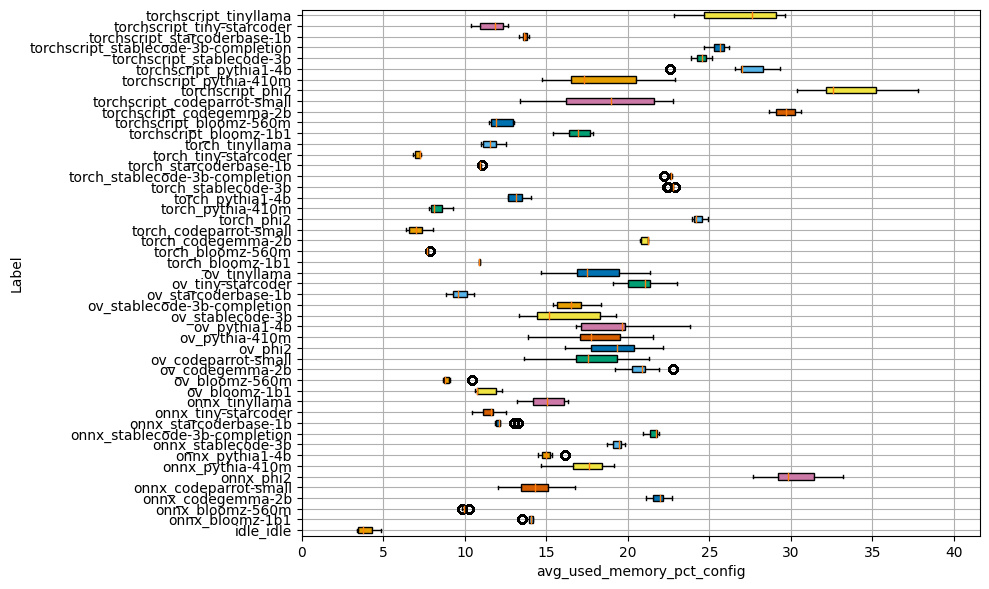

In [27]:


# Assuming combined_df is already created and contains the data
#variables_to_plot = ['diff_CPU_ENERGY (J)', 'avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'minus_avg_USED_MEMORY', 'avg_TOTAL_SWAP']

variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]
variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir+"energi_"+variable)

plt.show()


In [30]:
#energi_df.loc[energi_df['experiment'] == 10] 


### Nvidia

In [31]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/'

In [32]:
# Path where the CSV files are stored
#path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # change
all_files_nvidia = glob.glob(path + "/results_*/processed/nvidia*_processed_updated.csv") #change
all_files_nvidia

['D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_1\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_10\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_2\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_3\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_4\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_5\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_6\\processed\\nvidia_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\resu

In [33]:
result_numbers = []

li = []
for my_file in all_files_nvidia:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
nvidia_df = pd.concat(li, axis=0, ignore_index=True)
nvidia_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time runtime           model  \
0        2024-06-12 02:24:20.894   torch      pythia1-4b   
1        2024-06-12 02:24:20.997   torch      pythia1-4b   
2        2024-06-12 02:24:21.097   torch      pythia1-4b   
3        2024-06-12 02:24:21.198   torch      pythia1-4b   
4        2024-06-12 02:24:21.299   torch      pythia1-4b   
...                          ...     ...             ...   
8129279  2024-11-23 17:21:02.756      ov  tiny-starcoder   
8129280  2024-11-23 17:21:02.857      ov  tiny-starcoder   
8129281  2024-11-23 17:21:02.958      ov  tiny-starcoder   
8129282  2024-11-23 17:21:03.059      ov  tiny-starcoder   
8129283  2024-11-23 17:21:03.160      ov  tiny-starcoder   

          utilization.gpu [%]   utilization.memory [%]   memory.total [MiB]  \
0                           0                        0                24564   
1                           0                        0                24564   
2                           0                        0                24564   
3                           0                        0                24564   
4                           0                        0                24564   
...                       ...                      ...                  ...   
8129279                     0                        0                24564   
8129280                     0                        0                24564   
8129281                     0                        0                24564   
8129282                     0                        0                24564   
8129283                     0                        0                24564   

          memory.used [MiB]   power.draw [W]   power.max_limit [W]  \
0                        65            19.39                 500.0   
1                        65            19.39                 500.0   
2                        65            19.39                 500.0   
3                        65            19.39                 500.0   
4                        65            19.43                 500.0   
...                     ...              ...                   ...   
8129279                  68            19.60                 500.0   
8129280                  68            19.60                 500.0   
8129281                  68            19.66                 500.0   
8129282                  68            19.66                 500.0   
8129283                  68            19.66                 500.0   

          temperature.gpu  ... used_memory_pct_mib  \
0                      45  ...            0.264615   
1                      45  ...            0.264615   
2                      45  ...            0.264615   
3                      45  ...            0.264615   
4                      45  ...            0.264615   
...                   ...  ...                 ...   
8129279                38  ...            0.276828   
8129280                38  ...            0.276828   
8129281                38  ...            0.276828   
8129282                38  ...            0.276828   
8129283                38  ...            0.276828   

         avg_utilization_gpu_config  avg_utilization_memory_config  \
0                          0.005282                       0.000058   
1                          0.005282                       0.000058   
2                          0.005282                       0.000058   
3                          0.005282                       0.000058   
4                          0.005282                       0.000058   
...                             ...                            ...   
8129279                    0.000000                       0.000000   
8129280                    0.000000                       0.000000   
8129281                    0.000000                       0.000000   
8129282                    0.000000                       0.000000   
8129283                    0.000000                       0.000000   

         avg_memory_used_co

In [34]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_nvidia:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# nvidia_df = pd.concat(li, axis=0, ignore_index=True)
# nvidia_df

In [38]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [36]:
#variables_to_plot = ['diff_CPU_ENERGY (J)','avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'minus_avg_USED_MEMORY', 'minus_avg_USED_SWAP',]
# nvidia variables to plot
#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

#variables_to_plot

In [37]:
#condition = nvidia_df['label'].str.endswith('phi2')
#nvidia_plot = remove_condition_rows( condition, nvidia_df)
nvidia_plot = nvidia_df
nvidia_plot


time runtime           model  \
0        2024-06-12 02:24:20.894   torch      pythia1-4b   
1        2024-06-12 02:24:20.997   torch      pythia1-4b   
2        2024-06-12 02:24:21.097   torch      pythia1-4b   
3        2024-06-12 02:24:21.198   torch      pythia1-4b   
4        2024-06-12 02:24:21.299   torch      pythia1-4b   
...                          ...     ...             ...   
8129279  2024-11-23 17:21:02.756      ov  tiny-starcoder   
8129280  2024-11-23 17:21:02.857      ov  tiny-starcoder   
8129281  2024-11-23 17:21:02.958      ov  tiny-starcoder   
8129282  2024-11-23 17:21:03.059      ov  tiny-starcoder   
8129283  2024-11-23 17:21:03.160      ov  tiny-starcoder   

          utilization.gpu [%]   utilization.memory [%]   memory.total [MiB]  \
0                           0                        0                24564   
1                           0                        0                24564   
2                           0                        0                24564   
3                           0                        0                24564   
4                           0                        0                24564   
...                       ...                      ...                  ...   
8129279                     0                        0                24564   
8129280                     0                        0                24564   
8129281                     0                        0                24564   
8129282                     0                        0                24564   
8129283                     0                        0                24564   

          memory.used [MiB]   power.draw [W]   power.max_limit [W]  \
0                        65            19.39                 500.0   
1                        65            19.39                 500.0   
2                        65            19.39                 500.0   
3                        65            19.39                 500.0   
4                        65            19.43                 500.0   
...                     ...              ...                   ...   
8129279                  68            19.60                 500.0   
8129280                  68            19.60                 500.0   
8129281                  68            19.66                 500.0   
8129282                  68            19.66                 500.0   
8129283                  68            19.66                 500.0   

          temperature.gpu  ... used_memory_pct_mib  \
0                      45  ...            0.264615   
1                      45  ...            0.264615   
2                      45  ...            0.264615   
3                      45  ...            0.264615   
4                      45  ...            0.264615   
...                   ...  ...                 ...   
8129279                38  ...            0.276828   
8129280                38  ...            0.276828   
8129281                38  ...            0.276828   
8129282                38  ...            0.276828   
8129283                38  ...            0.276828   

         avg_utilization_gpu_config  avg_utilization_memory_config  \
0                          0.005282                       0.000058   
1                          0.005282                       0.000058   
2                          0.005282                       0.000058   
3                          0.005282                       0.000058   
4                          0.005282                       0.000058   
...                             ...                            ...   
8129279                    0.000000                       0.000000   
8129280                    0.000000                       0.000000   
8129281                    0.000000                       0.000000   
8129282                    0.000000                       0.000000   
8129283                    0.000000                       0.000000   

         avg_memory_used_co

In [24]:
#condition = nvidia_plot['label'].str.endswith('idle')

#nvidia_plot = remove_condition_rows( condition, nvidia_plot)
#nvidia_plot


In [25]:
# #variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

# nvidia_plot.rename(columns={'energy': 'Energy (Nvidia-smi) [J]'}, inplace=True)
# nvidia_plot.rename(columns={'config_duration': 'Execution time (Nvidia-smi) [s]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.gpu [%]': 'GPU usage (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.memory [%]': 'Used memory (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ memory.used [MiB]': 'Used GPU memory (Nvidia-smi) [MiB]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ temperature.gpu': 'GPU temperature (Nvidia-smi) [°]'}, inplace=True)

# variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']


In [39]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

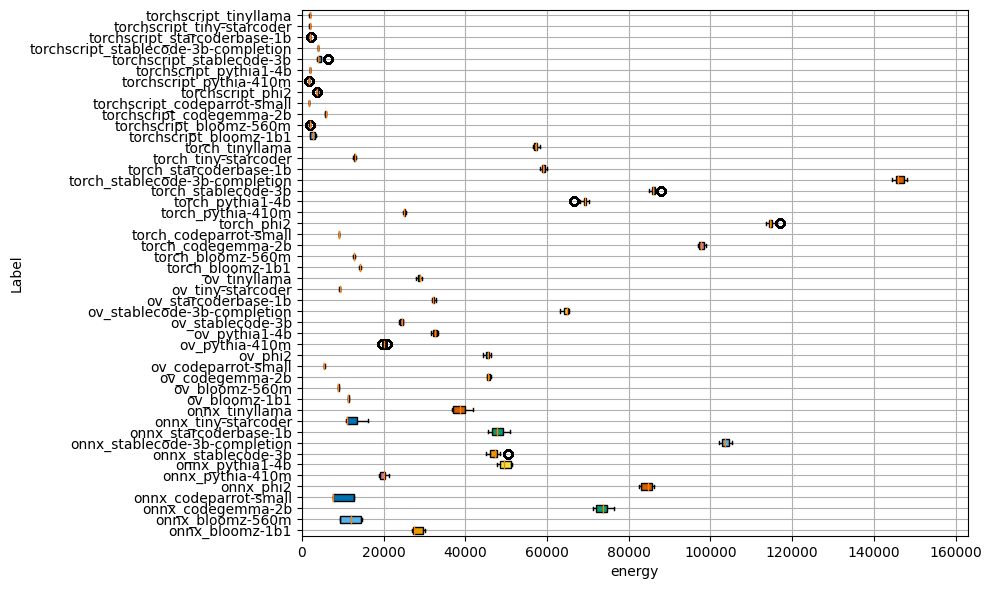

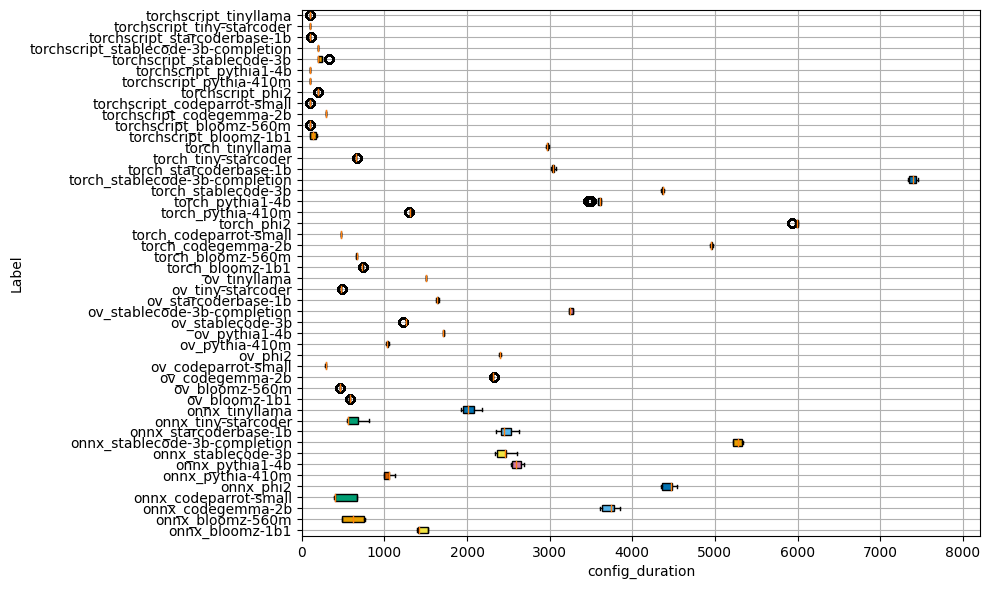

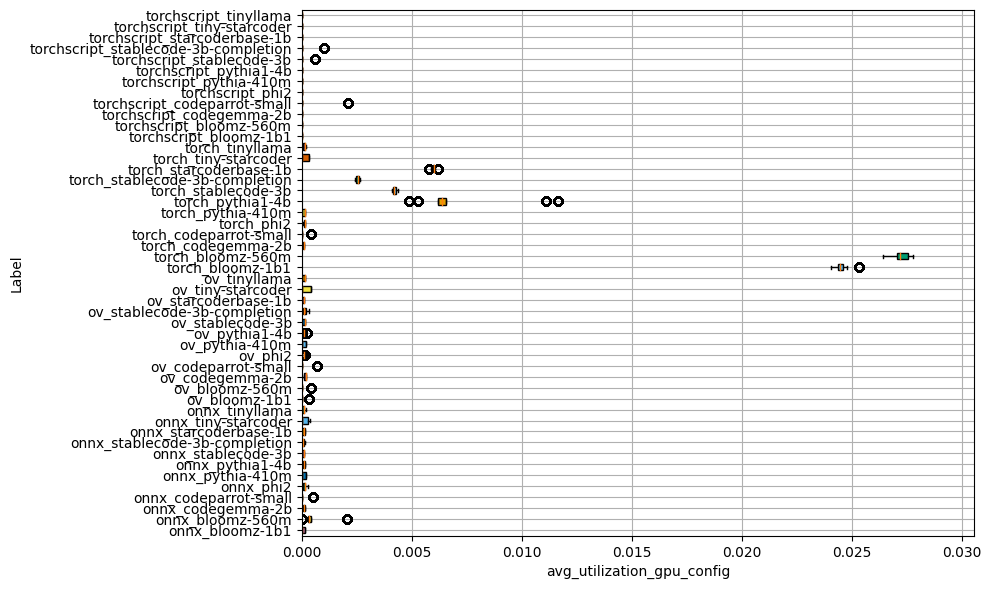

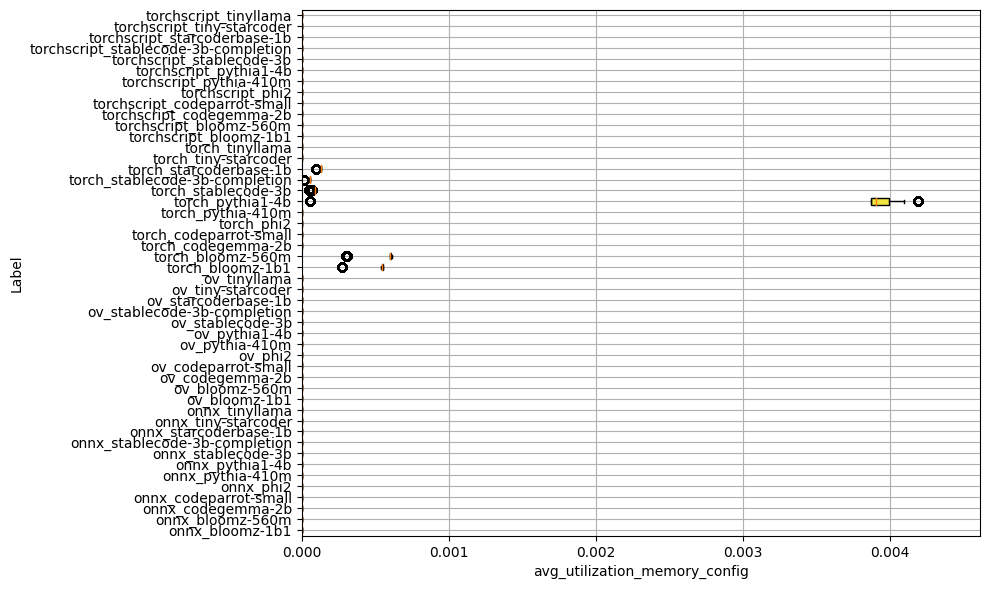

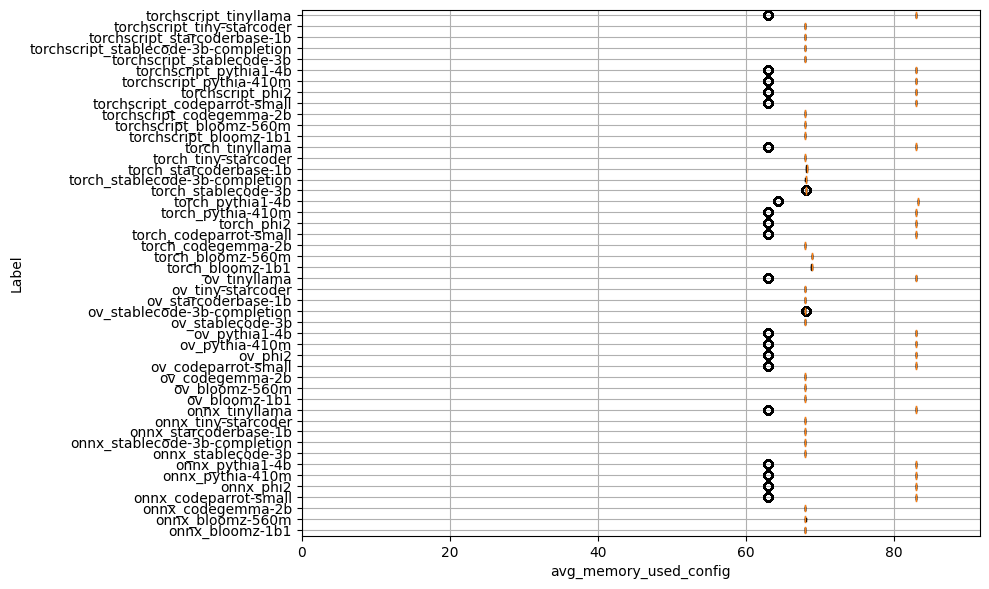

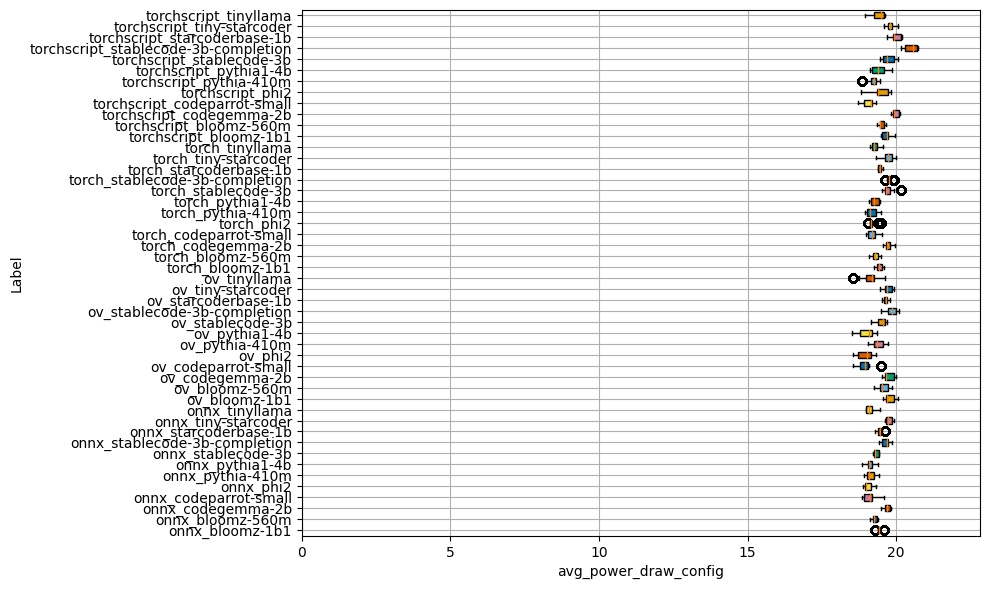

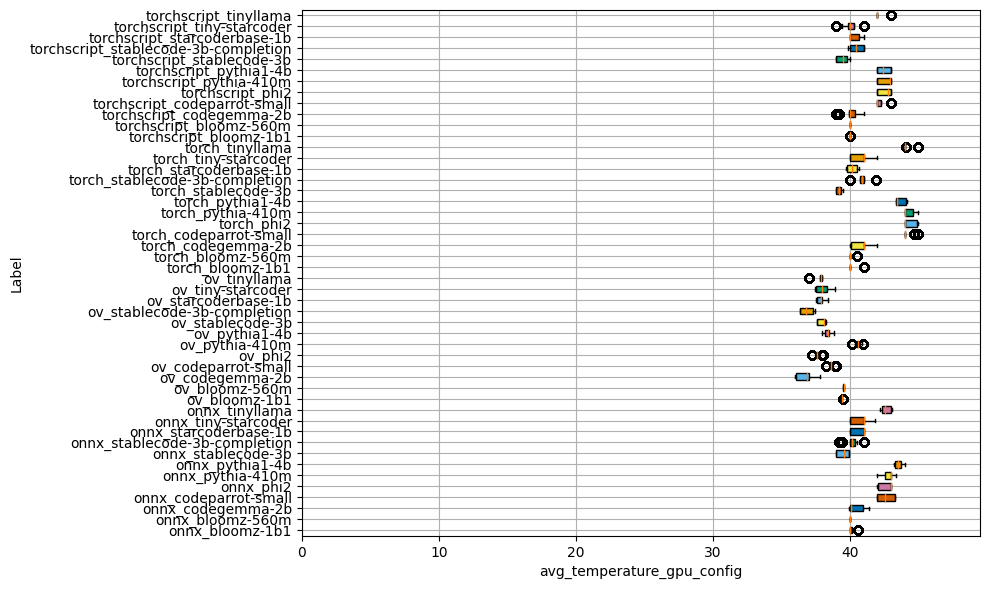

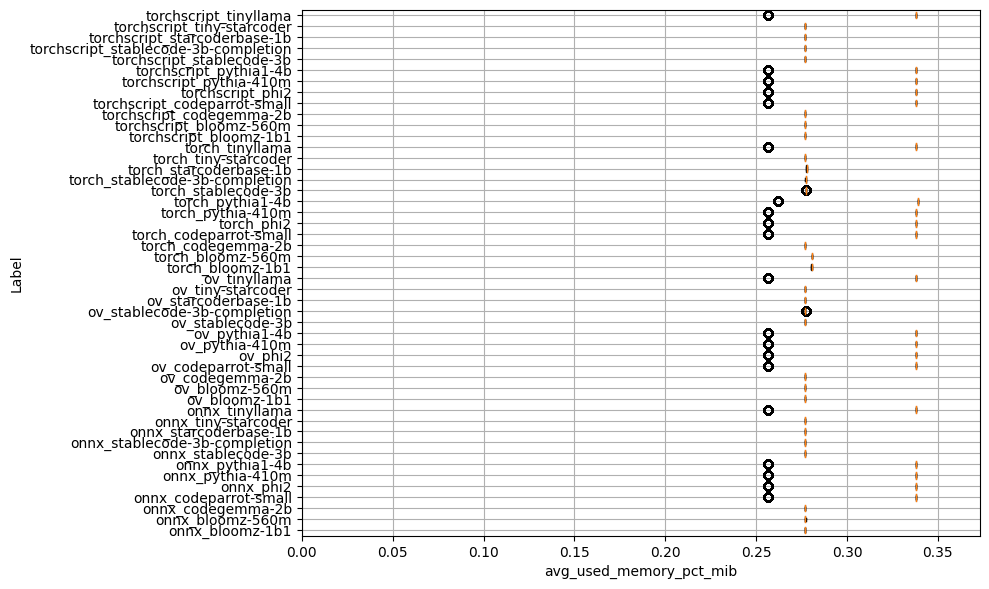

In [40]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']



n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    #plt.savefig(save_dir + "nvidia_"+variable)
    n+=1
plt.show()


### Wattmeter

In [41]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/'

In [42]:
# Path where the CSV files are stored
#path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # change
all_files_wattmeter = glob.glob(path + "/results_*/processed/wattmeter*_processed_updated.csv") #change
all_files_wattmeter

['D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_1\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_10\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_2\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_3\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_4\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_5\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_6\\processed\\wattmeter_processed_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_resul

In [43]:
result_numbers = []

li = []
for my_file in all_files_wattmeter:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
wattmeter_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time runtime           model  Current  \
0        2024-06-12 02:24:23.293257   torch      pythia1-4b      827   
1        2024-06-12 02:24:23.872180   torch      pythia1-4b      884   
2        2024-06-12 02:24:24.446018   torch      pythia1-4b      884   
3        2024-06-12 02:24:25.020958   torch      pythia1-4b      884   
4        2024-06-12 02:24:25.593001   torch      pythia1-4b      784   
...                             ...     ...             ...      ...   
1283135  2024-11-23 17:21:00.240801      ov  tiny-starcoder      934   
1283136  2024-11-23 17:21:00.817780      ov  tiny-starcoder      637   
1283137  2024-11-23 17:21:01.396776      ov  tiny-starcoder      637   
1283138  2024-11-23 17:21:01.969450      ov  tiny-starcoder      637   
1283139  2024-11-23 17:21:02.541090      ov  tiny-starcoder      922   

         PowerFactor   Phase  Energy  EnergyNR  Load              label  \
0               0.90  336.68  129298    129298   175   torch_pythia1-4b   
1               0.95  339.42  129298    129298   197   torch_pythia1-4b   
2               0.95  339.42  129298    129298   197   torch_pythia1-4b   
3               0.95  339.42  129298    129298   197   torch_pythia1-4b   
4               0.93  338.26  129298    129298   171   torch_pythia1-4b   
...              ...     ...     ...       ...   ...                ...   
1283135         0.92  340.42  451031    451031   203  ov_tiny-starcoder   
1283136         0.81  326.58  451031    451031   123  ov_tiny-starcoder   
1283137         0.81  326.58  451031    451031   123  ov_tiny-starcoder   
1283138         0.81  326.58  451031    451031   123  ov_tiny-starcoder   
1283139         0.92  338.40  451031    451031   201  ov_tiny-starcoder   

         energy_joules  energyNR_joules  energy_joules_config  \
0            465472800        465472800                586800   
1            465472800        465472800                586800   
2            465472800        465472800                586800   
3            465472800        465472800                586800   
4            465472800        465472800                586800   
...                ...              ...                   ...   
1283135     1623711600       1623711600                 68400   
1283136     1623711600       1623711600                 68400   
1283137     1623711600       1623711600                 68400   
1283138     1623711600       1623711600                 68400   
1283139     1623711600       1623711600                 68400   

         energyNR_joules_config  avg_Current  avg_PowerFactor   avg_Phase  \
0                        586800   784.274255         0.900857  334.525908   
1                        586800   784.274255         0.900857  334.525908   
2                        586800   784.274255         0.900857  334.525908   
3                        586800   784.274255         0.900857  334.525908   
4                        586800   784.274255         0.900857  334.525908   
...                         ...          ...              ...         ...   
1283135                   68400   709.761963         0.845926  328.234025   
1283136                   68400   709.761963         0.845926  328.234025   
1283137                   68400   709.761963         0.845926  328.234025   
1283138                   68400   709.761963         0.845926  328.234025   
1283139                   68400   709.761963         0.845926  328.234025   

           avg_Load  experiment  
0        167.053919           1  
1        167.053919           1  
2        167.053919           1  
3        167.053919           1  
4        167.053919           1  
...             ...         ...  
1283135  143.872393           9  
1283136  143.872393           9  
1283137  143.872393           9  
1283138  143.872393           9  
1283139  143.872393           9  

[1283140 rows x 19 columns]

In [44]:

# ## add experiments number
# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_wattmeter:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
# wattmeter_df

In [45]:
wattmeter_df.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [46]:
variables_to_plot = ['energy_joules_config', 'avg_Current', 'avg_PowerFactor', 'avg_Phase', 'avg_Load',]

In [47]:
#condition = wattmeter_df['label'].str.endswith('phi2')

#wattmeter_plot = remove_condition_rows( condition, wattmeter_df)
wattmeter_plot = wattmeter_df
wattmeter_plot

time runtime           model  Current  \
0        2024-06-12 02:24:23.293257   torch      pythia1-4b      827   
1        2024-06-12 02:24:23.872180   torch      pythia1-4b      884   
2        2024-06-12 02:24:24.446018   torch      pythia1-4b      884   
3        2024-06-12 02:24:25.020958   torch      pythia1-4b      884   
4        2024-06-12 02:24:25.593001   torch      pythia1-4b      784   
...                             ...     ...             ...      ...   
1283135  2024-11-23 17:21:00.240801      ov  tiny-starcoder      934   
1283136  2024-11-23 17:21:00.817780      ov  tiny-starcoder      637   
1283137  2024-11-23 17:21:01.396776      ov  tiny-starcoder      637   
1283138  2024-11-23 17:21:01.969450      ov  tiny-starcoder      637   
1283139  2024-11-23 17:21:02.541090      ov  tiny-starcoder      922   

         PowerFactor   Phase  Energy  EnergyNR  Load              label  \
0               0.90  336.68  129298    129298   175   torch_pythia1-4b   
1               0.95  339.42  129298    129298   197   torch_pythia1-4b   
2               0.95  339.42  129298    129298   197   torch_pythia1-4b   
3               0.95  339.42  129298    129298   197   torch_pythia1-4b   
4               0.93  338.26  129298    129298   171   torch_pythia1-4b   
...              ...     ...     ...       ...   ...                ...   
1283135         0.92  340.42  451031    451031   203  ov_tiny-starcoder   
1283136         0.81  326.58  451031    451031   123  ov_tiny-starcoder   
1283137         0.81  326.58  451031    451031   123  ov_tiny-starcoder   
1283138         0.81  326.58  451031    451031   123  ov_tiny-starcoder   
1283139         0.92  338.40  451031    451031   201  ov_tiny-starcoder   

         energy_joules  energyNR_joules  energy_joules_config  \
0            465472800        465472800                586800   
1            465472800        465472800                586800   
2            465472800        465472800                586800   
3            465472800        465472800                586800   
4            465472800        465472800                586800   
...                ...              ...                   ...   
1283135     1623711600       1623711600                 68400   
1283136     1623711600       1623711600                 68400   
1283137     1623711600       1623711600                 68400   
1283138     1623711600       1623711600                 68400   
1283139     1623711600       1623711600                 68400   

         energyNR_joules_config  avg_Current  avg_PowerFactor   avg_Phase  \
0                        586800   784.274255         0.900857  334.525908   
1                        586800   784.274255         0.900857  334.525908   
2                        586800   784.274255         0.900857  334.525908   
3                        586800   784.274255         0.900857  334.525908   
4                        586800   784.274255         0.900857  334.525908   
...                         ...          ...              ...         ...   
1283135                   68400   709.761963         0.845926  328.234025   
1283136                   68400   709.761963         0.845926  328.234025   
1283137                   68400   709.761963         0.845926  328.234025   
1283138                   68400   709.761963         0.845926  328.234025   
1283139                   68400   709.761963         0.845926  328.234025   

           avg_Load  experiment  
0        167.053919           1  
1        167.053919           1  
2        167.053919           1  
3        167.053919           1  
4        167.053919           1  
...             ...         ...  
1283135  143.872393           9  
1283136  143.872393           9  
1283137  143.872393           9  
1283138  143.872393           9  
1283139  143.872393           9  

[1283140 rows x 19 columns]

In [48]:
#condition = wattmeter_plot['label'].str.endswith('idle')

#wattmeter_plot = remove_condition_rows( condition, wattmeter_plot)
#wattmeter_plot


In [49]:

# wattmeter_plot.rename(columns={'energy_joules_config': 'Energy (Wattmeter) [J]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Current': 'Current [mA]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_PowerFactor': 'Power Factor [-]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Phase': 'Phase [°]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Load': 'Load [W]'}, inplace=True)

# variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']


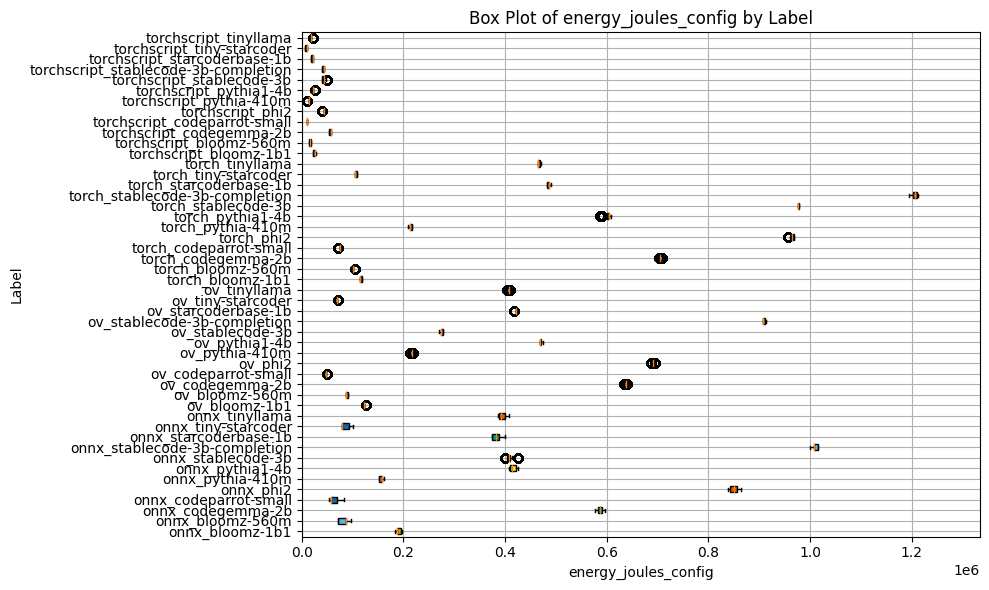

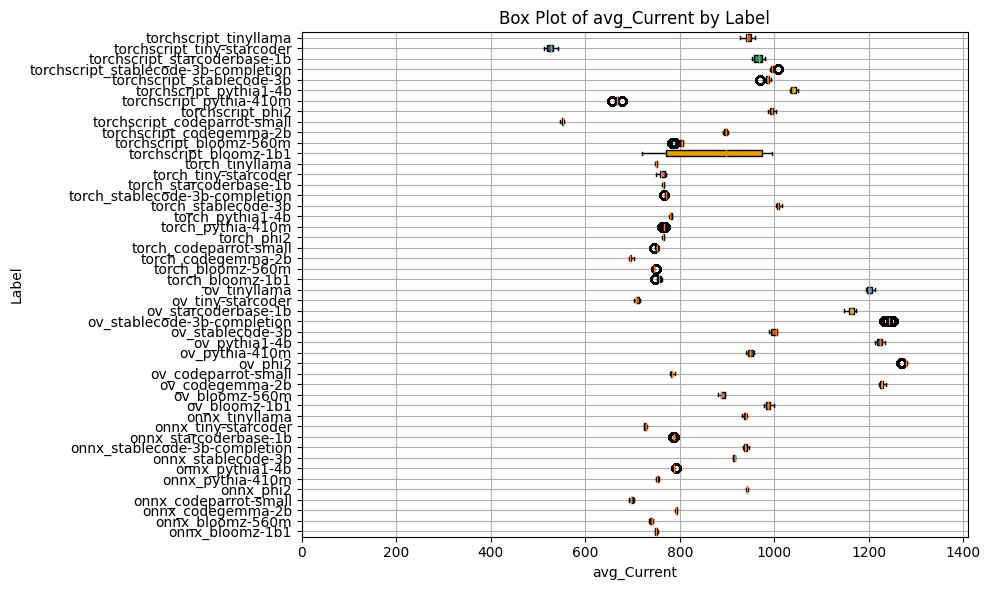

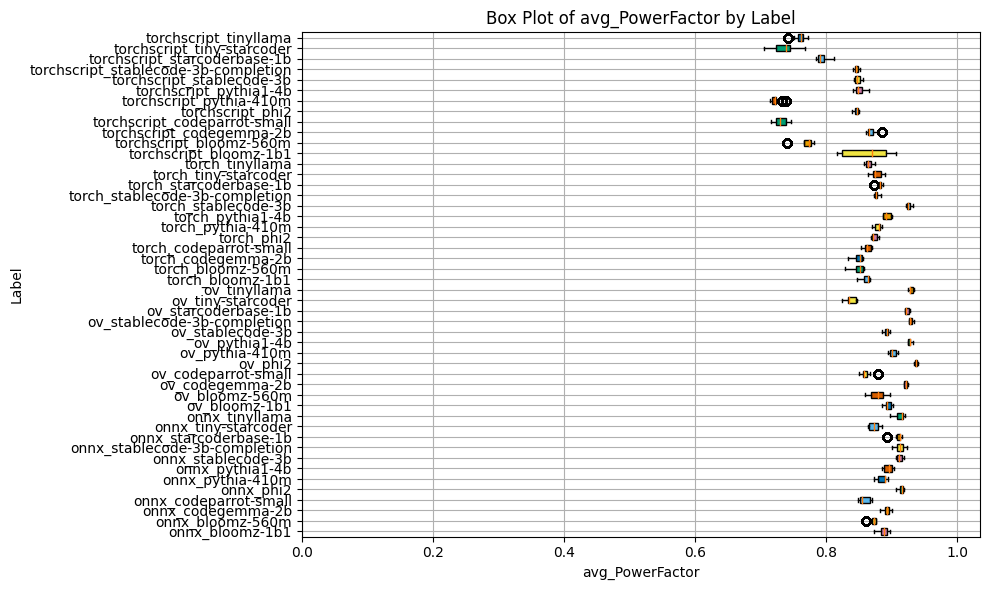

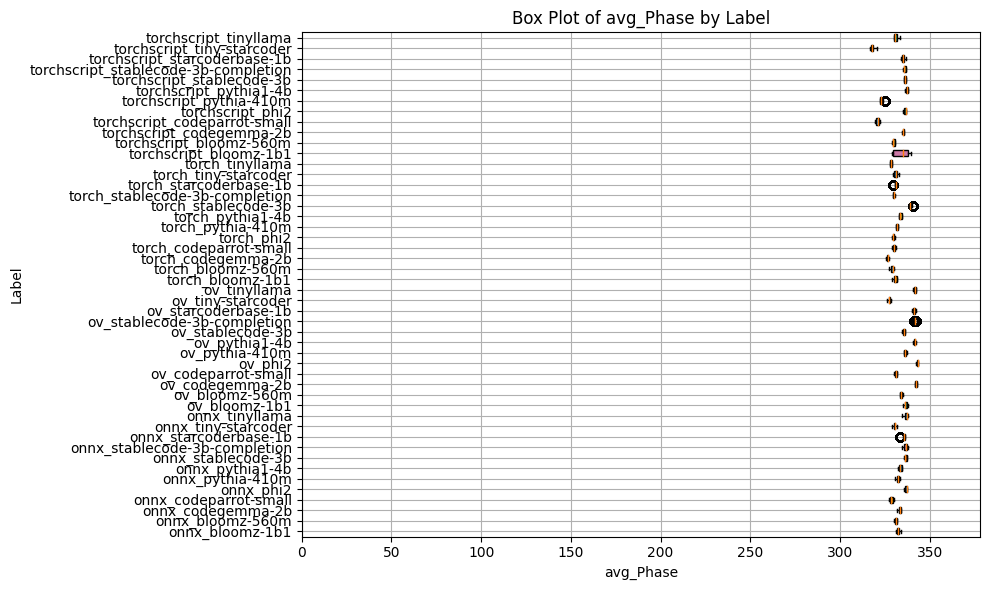

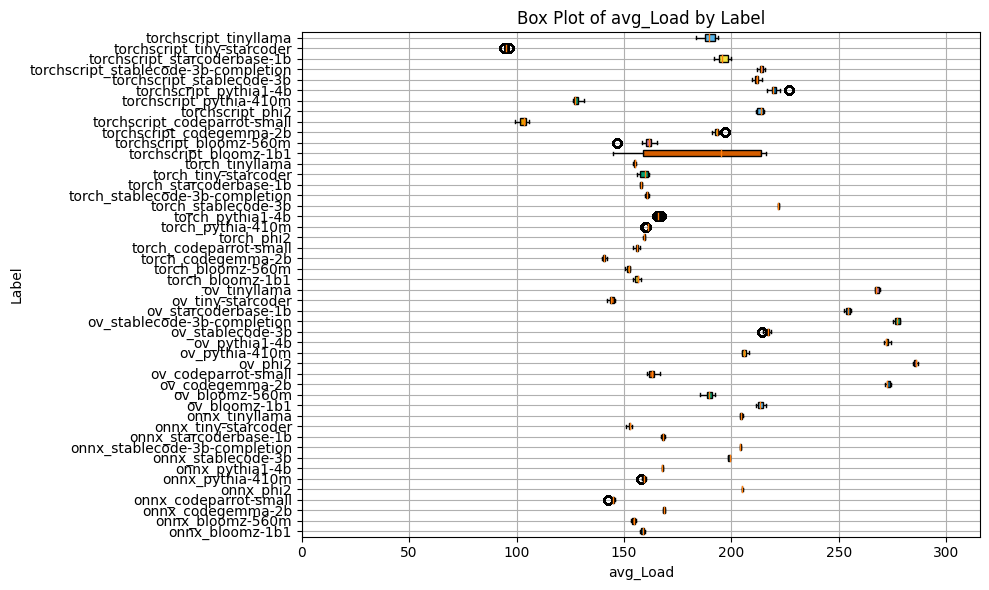

In [50]:
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']



# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir + "wattmeter_"+variable)

plt.show()


## RQ CPU energy + GPU energy

In [51]:
print(energi_df['energy'].max())
print(nvidia_df['energy'].max())
print(wattmeter_df['energy_joules_config'].max())


633753.2776031494
148114.7937325076
1213200


### box plots

In [52]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [53]:
energy_energi = energi_df[['runtime','model','label','energy','experiment']]
energy_energi

runtime           model              label        energy  experiment
0          idle            idle          idle_idle   5513.152359           1
1          idle            idle          idle_idle   5513.152359           1
2          idle            idle          idle_idle   5513.152359           1
3          idle            idle          idle_idle   5513.152359           1
4          idle            idle          idle_idle   5513.152359           1
...         ...             ...                ...           ...         ...
4108118      ov  tiny-starcoder  ov_tiny-starcoder  33850.092865           9
4108119      ov  tiny-starcoder  ov_tiny-starcoder  33850.092865           9
4108120      ov  tiny-starcoder  ov_tiny-starcoder  33850.092865           9
4108121      ov  tiny-starcoder  ov_tiny-starcoder  33850.092865           9
4108122      ov  tiny-starcoder  ov_tiny-starcoder  33850.092865           9

[4108123 rows x 5 columns]

In [54]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [55]:
energy_nvidia = nvidia_df[['runtime','model','label','energy','experiment']]
energy_nvidia

runtime           model              label        energy  experiment
0         torch      pythia1-4b   torch_pythia1-4b  66524.312200           1
1         torch      pythia1-4b   torch_pythia1-4b  66524.312200           1
2         torch      pythia1-4b   torch_pythia1-4b  66524.312200           1
3         torch      pythia1-4b   torch_pythia1-4b  66524.312200           1
4         torch      pythia1-4b   torch_pythia1-4b  66524.312200           1
...         ...             ...                ...           ...         ...
8129279      ov  tiny-starcoder  ov_tiny-starcoder   9289.689709           9
8129280      ov  tiny-starcoder  ov_tiny-starcoder   9289.689709           9
8129281      ov  tiny-starcoder  ov_tiny-starcoder   9289.689709           9
8129282      ov  tiny-starcoder  ov_tiny-starcoder   9289.689709           9
8129283      ov  tiny-starcoder  ov_tiny-starcoder   9289.689709           9

[8129284 rows x 5 columns]

In [56]:
cpu_aggregated = energy_energi.groupby(['label', 'experiment'])['energy'].mean().reset_index()
cpu_aggregated

label  experiment        energy
0                idle_idle           1   5513.152359
1                idle_idle           2   5561.186554
2                idle_idle           3   5483.603592
3                idle_idle           4   5449.920105
4                idle_idle           5   5253.230927
..                     ...         ...           ...
485  torchscript_tinyllama           6  11292.901901
486  torchscript_tinyllama           7  11275.560516
487  torchscript_tinyllama           8  11315.556534
488  torchscript_tinyllama           9  11278.999252
489  torchscript_tinyllama          10  11294.511658

[490 rows x 3 columns]

In [57]:
gpu_aggregated = energy_nvidia.groupby(['label', 'experiment'])['energy'].mean().reset_index()
gpu_aggregated

label  experiment        energy
0          onnx_bloomz-1b1           1  27053.547415
1          onnx_bloomz-1b1           2  27426.226650
2          onnx_bloomz-1b1           3  28094.652277
3          onnx_bloomz-1b1           4  29771.597639
4          onnx_bloomz-1b1           5  29564.200077
..                     ...         ...           ...
475  torchscript_tinyllama           6   1929.084494
476  torchscript_tinyllama           7   1923.520505
477  torchscript_tinyllama           8   1892.603001
478  torchscript_tinyllama           9   1923.929447
479  torchscript_tinyllama          10   1905.541080

[480 rows x 3 columns]

In [58]:
# Merge the aggregated dataframes
merged_df = pd.merge(cpu_aggregated, gpu_aggregated, on=['label', 'experiment'], how='outer')
merged_df

label  experiment      energy_x     energy_y
0                idle_idle           1   5513.152359          NaN
1                idle_idle           2   5561.186554          NaN
2                idle_idle           3   5483.603592          NaN
3                idle_idle           4   5449.920105          NaN
4                idle_idle           5   5253.230927          NaN
..                     ...         ...           ...          ...
485  torchscript_tinyllama           6  11292.901901  1929.084494
486  torchscript_tinyllama           7  11275.560516  1923.520505
487  torchscript_tinyllama           8  11315.556534  1892.603001
488  torchscript_tinyllama           9  11278.999252  1923.929447
489  torchscript_tinyllama          10  11294.511658  1905.541080

[490 rows x 4 columns]

In [59]:
merged_df.fillna(0, inplace=True)
merged_df

label  experiment      energy_x     energy_y
0                idle_idle           1   5513.152359     0.000000
1                idle_idle           2   5561.186554     0.000000
2                idle_idle           3   5483.603592     0.000000
3                idle_idle           4   5449.920105     0.000000
4                idle_idle           5   5253.230927     0.000000
..                     ...         ...           ...          ...
485  torchscript_tinyllama           6  11292.901901  1929.084494
486  torchscript_tinyllama           7  11275.560516  1923.520505
487  torchscript_tinyllama           8  11315.556534  1892.603001
488  torchscript_tinyllama           9  11278.999252  1923.929447
489  torchscript_tinyllama          10  11294.511658  1905.541080

[490 rows x 4 columns]

In [60]:
#merged_df.loc[merged_df['label'] == 'idle_idle'] 

In [61]:

#merged_df.loc[merged_df['label'] == 'onnx_tinyllama'] 

In [62]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/'

In [63]:
# merged_df.rename(columns={'energy_x': 'CPU energy (config) [J]'}, inplace=True)
# merged_df.rename(columns={'energy_y': 'GPU energy (config) [J]'}, inplace=True)
# merged_df['Total energy [J]'] = merged_df['CPU energy (config) [J]'] + merged_df['GPU energy (config) [J]'] 
merged_df.rename(columns={'energy_x': 'CPU_energy'}, inplace=True)
merged_df.rename(columns={'energy_y': 'GPU_energy'}, inplace=True)
merged_df['global_energy'] = merged_df['CPU_energy'] + merged_df['GPU_energy'] 
merged_df

label  experiment    CPU_energy   GPU_energy  \
0                idle_idle           1   5513.152359     0.000000   
1                idle_idle           2   5561.186554     0.000000   
2                idle_idle           3   5483.603592     0.000000   
3                idle_idle           4   5449.920105     0.000000   
4                idle_idle           5   5253.230927     0.000000   
..                     ...         ...           ...          ...   
485  torchscript_tinyllama           6  11292.901901  1929.084494   
486  torchscript_tinyllama           7  11275.560516  1923.520505   
487  torchscript_tinyllama           8  11315.556534  1892.603001   
488  torchscript_tinyllama           9  11278.999252  1923.929447   
489  torchscript_tinyllama          10  11294.511658  1905.541080   

     global_energy  
0      5513.152359  
1      5561.186554  
2      5483.603592  
3      5449.920105  
4      5253.230927  
..             ...  
485   13221.986395  
486   13199.081021  
487   13208.159535  
488   13202.928699  
489   13200.052738  

[490 rows x 5 columns]

In [64]:
#condition = merged_df['label'].str.endswith('phi2')

#merged_df_plot = remove_condition_rows( condition, merged_df)
merged_df_plot = merged_df

merged_df_plot

label  experiment    CPU_energy   GPU_energy  \
0                idle_idle           1   5513.152359     0.000000   
1                idle_idle           2   5561.186554     0.000000   
2                idle_idle           3   5483.603592     0.000000   
3                idle_idle           4   5449.920105     0.000000   
4                idle_idle           5   5253.230927     0.000000   
..                     ...         ...           ...          ...   
485  torchscript_tinyllama           6  11292.901901  1929.084494   
486  torchscript_tinyllama           7  11275.560516  1923.520505   
487  torchscript_tinyllama           8  11315.556534  1892.603001   
488  torchscript_tinyllama           9  11278.999252  1923.929447   
489  torchscript_tinyllama          10  11294.511658  1905.541080   

     global_energy  
0      5513.152359  
1      5561.186554  
2      5483.603592  
3      5449.920105  
4      5253.230927  
..             ...  
485   13221.986395  
486   13199.081021  
487   13208.159535  
488   13202.928699  
489   13200.052738  

[490 rows x 5 columns]

In [65]:
print(tables_dir)
merged_df_plot.to_csv(tables_dir+'final_energy_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/tables/


In [66]:
merged_df_plot

label  experiment    CPU_energy   GPU_energy  \
0                idle_idle           1   5513.152359     0.000000   
1                idle_idle           2   5561.186554     0.000000   
2                idle_idle           3   5483.603592     0.000000   
3                idle_idle           4   5449.920105     0.000000   
4                idle_idle           5   5253.230927     0.000000   
..                     ...         ...           ...          ...   
485  torchscript_tinyllama           6  11292.901901  1929.084494   
486  torchscript_tinyllama           7  11275.560516  1923.520505   
487  torchscript_tinyllama           8  11315.556534  1892.603001   
488  torchscript_tinyllama           9  11278.999252  1923.929447   
489  torchscript_tinyllama          10  11294.511658  1905.541080   

     global_energy  
0      5513.152359  
1      5561.186554  
2      5483.603592  
3      5449.920105  
4      5253.230927  
..             ...  
485   13221.986395  
486   13199.081021  
487   13208.159535  
488   13202.928699  
489   13200.052738  

[490 rows x 5 columns]

In [67]:
# condition = merged_df_plot['label'] == 'idle_idle'
# merged_df_plot = merged_df_plot[~condition]
# merged_df_plot

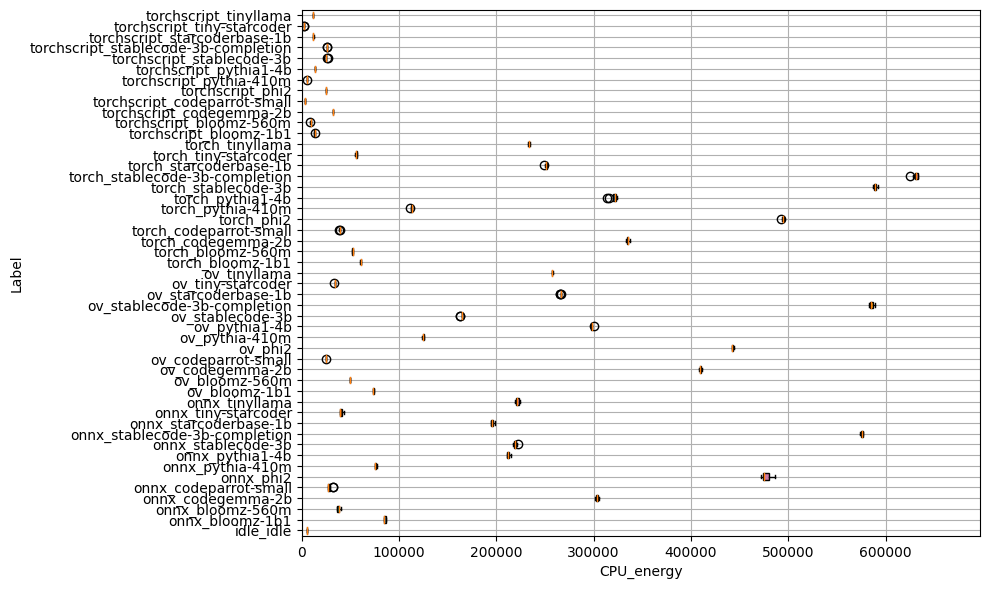

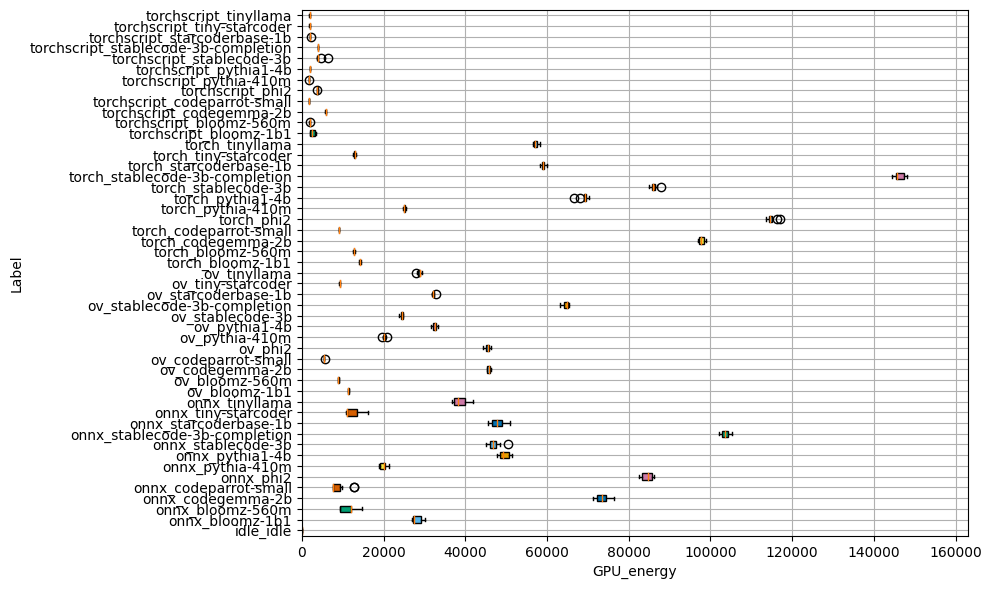

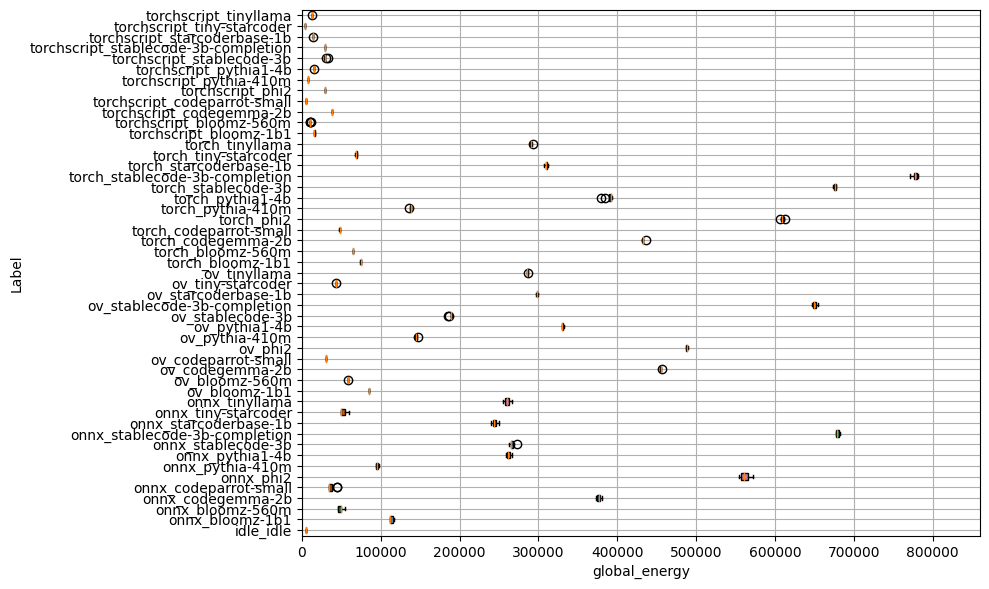

In [68]:

variables_to_plot = ['CPU_energy','GPU_energy','global_energy']
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = merged_df_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color
        
        #median = np.median(group[variable].dropna())
        #print(name +" -> "+ str(median))

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,merged_df_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "energy_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


### Median values of energy

In [69]:
# Calculate mean values for each label
df = merged_df_plot
median_energy_values = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_energy_values.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_energy_values

label  experiment     CPU_energy  \
0                              idle_idle         5.5    5450.420303   
1                        onnx_bloomz-1b1         5.5   85002.455544   
2                       onnx_bloomz-560m         5.5   38111.320023   
3                      onnx_codegemma-2b         5.5  303140.927048   
4                  onnx_codeparrot-small         5.5   27370.594078   
5                              onnx_phi2         5.5  475452.949699   
6                       onnx_pythia-410m         5.5   75764.569603   
7                        onnx_pythia1-4b         5.5  212320.958244   
8                     onnx_stablecode-3b         5.5  218677.233612   
9          onnx_stablecode-3b-completion         5.5  575477.807861   
10                 onnx_starcoderbase-1b         5.5  195971.865395   
11                   onnx_tiny-starcoder         5.5   39030.933838   
12                        onnx_tinyllama         5.5  221268.890221   
13                         ov_bloomz-1b1         5.5   73707.834908   
14                        ov_bloomz-560m         5.5   49575.380554   
15                       ov_codegemma-2b         5.5  409354.084854   
16                   ov_codeparrot-small         5.5   24936.388664   
17                               ov_phi2         5.5  442486.860435   
18                        ov_pythia-410m         5.5  125089.230072   
19                         ov_pythia1-4b         5.5  298005.695007   
20                      ov_stablecode-3b         5.5  164810.150757   
21           ov_stablecode-3b-completion         5.5  585458.906937   
22                   ov_starcoderbase-1b         5.5  266296.419228   
23                     ov_tiny-starcoder         5.5   33898.503883   
24                          ov_tinyllama         5.5  257276.523949   
25                      torch_bloomz-1b1         5.5   60622.102364   
26                     torch_bloomz-560m         5.5   52217.206894   
27                    torch_codegemma-2b         5.5  334939.674240   
28                torch_codeparrot-small         5.5   38922.891640   
29                            torch_phi2         5.5  494766.105080   
30                     torch_pythia-410m         5.5  112852.760742   
31                      torch_pythia1-4b         5.5  322246.035751   
32                   torch_stablecode-3b         5.5  589430.745087   
33        torch_stablecode-3b-completion         5.5  631788.437874   
34                torch_starcoderbase-1b         5.5  251167.658401   
35                  torch_tiny-starcoder         5.5   55982.155212   
36                       torch_tinyllama         5.5  233383.063507   
37                torchscript_bloomz-1b1         5.5   13192.124016   
38               torchscript_bloomz-560m         5.5    9037.917389   
39              torchscript_codegemma-2b         5.5   32470.153503   
40          torchscript_codeparrot-small         5.5    3198.062904   
41                      torchscript_phi2         5.5   25242.733498   
42               torchscript_pythia-410m         5.5    5577.050285   
43                torchscript_pythia1-4b         5.5   13464.634064   
44             torchscript_stablecode-3b         5.5   25239.565865   
45  torchscript_stablecode-3b-completion         5.5   25700.484940   
46          torchscript_starcoderbase-1b         5.5   12014.307899   
47            torchscript_tiny-starcoder         5.5    2670.360245   
48                 torchscript_tinyllama         5.5   11293.706779   

       GPU_energy  global_energy  
0        0.000000    5450.420303  
1    27376.611014  112376.080240  
2    11943.890642   50055.210664  
3    73445.498033  376432.497971  
4     7695.837711   35024.957307  
5    84742.714270  560611.319751  
6    20115.917003   95902.225445  
7    49335.967747  261702.503859  
8    46760.632091  265124.753986  
9   103629.692122  678464.662778  
10   47666.006673  243245.721233  
11   11031.032440   50037.235256  
12   38324.805405  259593.695

In [70]:
# Split the 'label' column into 'runtime' and 'model'
median_energy_values[['runtime', 'model']] = median_energy_values['label'].str.split('_', n=1, expand=True)
median_energy_values

label  experiment     CPU_energy  \
0                              idle_idle         5.5    5450.420303   
1                        onnx_bloomz-1b1         5.5   85002.455544   
2                       onnx_bloomz-560m         5.5   38111.320023   
3                      onnx_codegemma-2b         5.5  303140.927048   
4                  onnx_codeparrot-small         5.5   27370.594078   
5                              onnx_phi2         5.5  475452.949699   
6                       onnx_pythia-410m         5.5   75764.569603   
7                        onnx_pythia1-4b         5.5  212320.958244   
8                     onnx_stablecode-3b         5.5  218677.233612   
9          onnx_stablecode-3b-completion         5.5  575477.807861   
10                 onnx_starcoderbase-1b         5.5  195971.865395   
11                   onnx_tiny-starcoder         5.5   39030.933838   
12                        onnx_tinyllama         5.5  221268.890221   
13                         ov_bloomz-1b1         5.5   73707.834908   
14                        ov_bloomz-560m         5.5   49575.380554   
15                       ov_codegemma-2b         5.5  409354.084854   
16                   ov_codeparrot-small         5.5   24936.388664   
17                               ov_phi2         5.5  442486.860435   
18                        ov_pythia-410m         5.5  125089.230072   
19                         ov_pythia1-4b         5.5  298005.695007   
20                      ov_stablecode-3b         5.5  164810.150757   
21           ov_stablecode-3b-completion         5.5  585458.906937   
22                   ov_starcoderbase-1b         5.5  266296.419228   
23                     ov_tiny-starcoder         5.5   33898.503883   
24                          ov_tinyllama         5.5  257276.523949   
25                      torch_bloomz-1b1         5.5   60622.102364   
26                     torch_bloomz-560m         5.5   52217.206894   
27                    torch_codegemma-2b         5.5  334939.674240   
28                torch_codeparrot-small         5.5   38922.891640   
29                            torch_phi2         5.5  494766.105080   
30                     torch_pythia-410m         5.5  112852.760742   
31                      torch_pythia1-4b         5.5  322246.035751   
32                   torch_stablecode-3b         5.5  589430.745087   
33        torch_stablecode-3b-completion         5.5  631788.437874   
34                torch_starcoderbase-1b         5.5  251167.658401   
35                  torch_tiny-starcoder         5.5   55982.155212   
36                       torch_tinyllama         5.5  233383.063507   
37                torchscript_bloomz-1b1         5.5   13192.124016   
38               torchscript_bloomz-560m         5.5    9037.917389   
39              torchscript_codegemma-2b         5.5   32470.153503   
40          torchscript_codeparrot-small         5.5    3198.062904   
41                      torchscript_phi2         5.5   25242.733498   
42               torchscript_pythia-410m         5.5    5577.050285   
43                torchscript_pythia1-4b         5.5   13464.634064   
44             torchscript_stablecode-3b         5.5   25239.565865   
45  torchscript_stablecode-3b-completion         5.5   25700.484940   
46          torchscript_starcoderbase-1b         5.5   12014.307899   
47            torchscript_tiny-starcoder         5.5    2670.360245   
48                 torchscript_tinyllama         5.5   11293.706779   

       GPU_energy  global_energy      runtime                     model  
0        0.000000    5450.420303         idle                      idle  
1    27376.611014  112376.080240         onnx                bloomz-1b1  
2    11943.890642   50055.210664         onnx               bloomz-560m  
3    73445.498033  376432.497971         onnx              codegemma-2b  
4     7695.837711   35024.957307         onnx          codeparrot-small  
5    84742.714270  560611.319751        

In [71]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_energy_values.columns[-2:]) + list(median_energy_values.columns[:-2])
# Reorder the columns by indexing in the new order
median_energy_values = median_energy_values[new_order]
median_energy_values

runtime                     model  \
0          idle                      idle   
1          onnx                bloomz-1b1   
2          onnx               bloomz-560m   
3          onnx              codegemma-2b   
4          onnx          codeparrot-small   
5          onnx                      phi2   
6          onnx               pythia-410m   
7          onnx                pythia1-4b   
8          onnx             stablecode-3b   
9          onnx  stablecode-3b-completion   
10         onnx          starcoderbase-1b   
11         onnx            tiny-starcoder   
12         onnx                 tinyllama   
13           ov                bloomz-1b1   
14           ov               bloomz-560m   
15           ov              codegemma-2b   
16           ov          codeparrot-small   
17           ov                      phi2   
18           ov               pythia-410m   
19           ov                pythia1-4b   
20           ov             stablecode-3b   
21           ov  stablecode-3b-completion   
22           ov          starcoderbase-1b   
23           ov            tiny-starcoder   
24           ov                 tinyllama   
25        torch                bloomz-1b1   
26        torch               bloomz-560m   
27        torch              codegemma-2b   
28        torch          codeparrot-small   
29        torch                      phi2   
30        torch               pythia-410m   
31        torch                pythia1-4b   
32        torch             stablecode-3b   
33        torch  stablecode-3b-completion   
34        torch          starcoderbase-1b   
35        torch            tiny-starcoder   
36        torch                 tinyllama   
37  torchscript                bloomz-1b1   
38  torchscript               bloomz-560m   
39  torchscript              codegemma-2b   
40  torchscript          codeparrot-small   
41  torchscript                      phi2   
42  torchscript               pythia-410m   
43  torchscript                pythia1-4b   
44  torchscript             stablecode-3b   
45  torchscript  stablecode-3b-completion   
46  torchscript          starcoderbase-1b   
47  torchscript            tiny-starcoder   
48  torchscript                 tinyllama   

                                   label  experiment     CPU_energy  \
0                              idle_idle         5.5    5450.420303   
1                        onnx_bloomz-1b1         5.5   85002.455544   
2                       onnx_bloomz-560m         5.5   38111.320023   
3                      onnx_codegemma-2b         5.5  303140.927048   
4                  onnx_codeparrot-small         5.5   27370.594078   
5                              onnx_phi2         5.5  475452.949699   
6                       onnx_pythia-410m         5.5   75764.569603   
7                        onnx_pythia1-4b         5.5  212320.958244   
8                     onnx_stablecode-3b         5.5  218677.233612   
9          onnx_stablecode-3b-completion         5.5  575477.807861   
10                 onnx_starcoderbase-1b         5.5  195971.865395   
11                   onnx_tiny-starcoder         5.5   39030.933838   
12                        onnx_tinyllama         5.5  221268.890221   
13                         ov_bloomz-1b1         5.5   73707.834908   
14                        ov_bloomz-560m         5.5   49575.380554   
15                       ov_codegemma-2b         5.5  409354.084854   
16                   ov_codeparrot-small         5.5   24936.388664   
17                               ov_phi2         5.5  442486.860435   
18                        ov_pythia-410m         5.5  125089.230072   
19                         ov_pythia1-4b         5.5  298005.695007   
20                      ov_stablecode-3b         5.5  164810.150757   
21           ov_stablecode-3b-completion         5.5  585458.906937   
22                   ov_starcoderbase-1b         5.5  266296.419228   
23                     ov_tiny-starcoder         5.5 

In [72]:
median_energy_values.to_csv(tables_dir+'median_energy_values.csv', index=False)  if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [73]:
median_energy_values = median_energy_values.drop(columns = ['label','experiment'])


In [74]:
median_energy_values

runtime                     model     CPU_energy     GPU_energy  \
0          idle                      idle    5450.420303       0.000000   
1          onnx                bloomz-1b1   85002.455544   27376.611014   
2          onnx               bloomz-560m   38111.320023   11943.890642   
3          onnx              codegemma-2b  303140.927048   73445.498033   
4          onnx          codeparrot-small   27370.594078    7695.837711   
5          onnx                      phi2  475452.949699   84742.714270   
6          onnx               pythia-410m   75764.569603   20115.917003   
7          onnx                pythia1-4b  212320.958244   49335.967747   
8          onnx             stablecode-3b  218677.233612   46760.632091   
9          onnx  stablecode-3b-completion  575477.807861  103629.692122   
10         onnx          starcoderbase-1b  195971.865395   47666.006673   
11         onnx            tiny-starcoder   39030.933838   11031.032440   
12         onnx                 tinyllama  221268.890221   38324.805405   
13           ov                bloomz-1b1   73707.834908   11377.866425   
14           ov               bloomz-560m   49575.380554    8955.389944   
15           ov              codegemma-2b  409354.084854   45699.300883   
16           ov          codeparrot-small   24936.388664    5455.467005   
17           ov                      phi2  442486.860435   45647.618833   
18           ov               pythia-410m  125089.230072   20033.277757   
19           ov                pythia1-4b  298005.695007   32518.830688   
20           ov             stablecode-3b  164810.150757   24580.748224   
21           ov  stablecode-3b-completion  585458.906937   64813.931929   
22           ov          starcoderbase-1b  266296.419228   32209.773169   
23           ov            tiny-starcoder   33898.503883    9357.673047   
24           ov                 tinyllama  257276.523949   28813.319413   
25        torch                bloomz-1b1   60622.102364   14284.514252   
26        torch               bloomz-560m   52217.206894   12815.031111   
27        torch              codegemma-2b  334939.674240   97585.746017   
28        torch          codeparrot-small   38922.891640    9092.602461   
29        torch                      phi2  494766.105080  114590.373437   
30        torch               pythia-410m  112852.760742   25091.182744   
31        torch                pythia1-4b  322246.035751   69242.889154   
32        torch             stablecode-3b  589430.745087   86043.950278   
33        torch  stablecode-3b-completion  631788.437874  145714.533574   
34        torch          starcoderbase-1b  251167.658401   58950.213114   
35        torch            tiny-starcoder   55982.155212   12925.986384   
36        torch                 tinyllama  233383.063507   57084.966170   
37  torchscript                bloomz-1b1   13192.124016    2596.718367   
38  torchscript               bloomz-560m    9037.917389    1900.980329   
39  torchscript              codegemma-2b   32470.153503    5835.566838   
40  torchscript          codeparrot-small    3198.062904    1829.733874   
41  torchscript                      phi2   25242.733498    3836.562885   
42  torchscript               pythia-410m    5577.050285    1852.853754   
43  torchscript                pythia1-4b   13464.634064    1940.550932   
44  torchscript             stablecode-3b   25239.565865    3903.095825   
45  torchscript  stablecode-3b-completion   25700.484940    4011.271146   
46  torchscript          starcoderbase-1b   12014.307899    1965.153549   
47  torchscript            tiny-starcoder    2670.360245    1907.702828   
48  torchscript                 tinyllama   11293.706779    1911.762415   

    global_energy  
0     5450.420303  
1   112376.080240  
2    50055.210664  
3   376432.497971  
4    35024.957307  
5   560611.319751  
6    95902.225445  
7   261702.503859  
8   265124.753986  
9   678464.662778  
10  243245.721233  
11   50037.235256

In [75]:
filename = tables_dir + 'median_energy_values.tex'
save_latex_table(median_energy_values,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & CPU energy & GPU energy & global energy \\
\midrule
idle & idle & 5450.420303 & 0.000000 & 5450.420303 \\
onnx & bloomz-1b1 & 85002.455544 & 27376.611014 & 112376.080240 \\
onnx & bloomz-560m & 38111.320023 & 11943.890642 & 50055.210664 \\
onnx & codegemma-2b & 303140.927048 & 73445.498033 & 376432.497971 \\
onnx & codeparrot-small & 27370.594078 & 7695.837711 & 35024.957307 \\
onnx & phi2 & 475452.949699 & 84742.714270 & 560611.319751 \\
onnx & pythia-410m & 75764.569603 & 20115.917003 & 95902.225445 \\
onnx & pythia1-4b & 212320.958244 & 49335.967747 & 261702.503859 \\
onnx & stablecode-3b & 218677.233612 & 46760.632091 & 265124.753986 \\
onnx & stablecode-3b-completion & 575477.807861 & 103629.692122 & 678464.662778 \\
onnx & starcoderbase-1b & 195971.865395 & 47666.006673 & 243245.721233 \\
onnx & tiny-starcoder & 39030.933838 & 11031.032440 & 50037.235256 \\
onnx & tinyllama & 221268.890221 & 38324.805405 & 259593.695626 \\
ov & bl

In [62]:
# # Convert DataFrame to LaTeX table
# latex_table = median_energy_values.to_latex(index=False)

# # Define the filename
#filename = tables_dir + 'median_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

### Mean values of energy

In [76]:
# Calculate mean values for each label
df = merged_df_plot
mean_values = df.groupby('label').mean()

# Optionally, you might want to reset the index if you need 'label' as a column
mean_values.reset_index(inplace=True)

mean_values = mean_values.drop(columns = ['experiment'])
mean_values

label     CPU_energy     GPU_energy  \
0                              idle_idle    5372.618376       0.000000   
1                        onnx_bloomz-1b1   85310.407762   28101.509144   
2                       onnx_bloomz-560m   37800.086281   11501.934555   
3                      onnx_codegemma-2b  303178.569423   73497.083910   
4                  onnx_codeparrot-small   28421.296902    8913.686970   
5                              onnx_phi2  477257.500885   84569.602344   
6                       onnx_pythia-410m   75678.377306   19888.409550   
7                        onnx_pythia1-4b  212442.140479   49551.952713   
8                     onnx_stablecode-3b  219134.788177   47029.096454   
9          onnx_stablecode-3b-completion  575588.583055  103614.654476   
10                 onnx_starcoderbase-1b  196135.614204   47814.462958   
11                   onnx_tiny-starcoder   39984.646523   12246.149217   
12                        onnx_tinyllama  221681.730835   38885.363977   
13                         ov_bloomz-1b1   73736.882425   11420.721468   
14                        ov_bloomz-560m   49614.428979    8973.358318   
15                       ov_codegemma-2b  409616.062099   45750.486750   
16                   ov_codeparrot-small   24927.568626    5448.855568   
17                               ov_phi2  442850.714137   45511.908917   
18                        ov_pythia-410m  125012.195085   20112.370219   
19                         ov_pythia1-4b  298114.634114   32515.087758   
20                      ov_stablecode-3b  164386.881813   24464.331340   
21           ov_stablecode-3b-completion  585701.354292   64610.662326   
22                   ov_starcoderbase-1b  266250.061501   32234.412945   
23                     ov_tiny-starcoder   33845.076753    9346.436274   
24                          ov_tinyllama  257326.069200   28732.455991   
25                      torch_bloomz-1b1   60577.382536   14273.777945   
26                     torch_bloomz-560m   52258.721951   12800.757537   
27                    torch_codegemma-2b  334929.433031   97739.681828   
28                torch_codeparrot-small   38924.630074    9090.853239   
29                            torch_phi2  494568.147421  114911.061160   
30                     torch_pythia-410m  112838.778185   25089.763713   
31                      torch_pythia1-4b  320742.622809   69045.436433   
32                   torch_stablecode-3b  589496.538347   86182.677792   
33        torch_stablecode-3b-completion  631304.690672  146183.696539   
34                torch_starcoderbase-1b  251096.722368   59099.024355   
35                  torch_tiny-starcoder   56076.839536   12935.482026   
36                       torch_tinyllama  233599.823721   57253.830025   
37                torchscript_bloomz-1b1   13335.639490    2618.267969   
38               torchscript_bloomz-560m    9029.035649    1909.185018   
39              torchscript_codegemma-2b   32429.435558    5834.482961   
40          torchscript_codeparrot-small    3209.713045    1827.318530   
41                      torchscript_phi2   25248.827071    3820.544520   
42               torchscript_pythia-410m    5587.000764    1848.437232   
43                torchscript_pythia1-4b   13459.018314    1940.156969   
44             torchscript_stablecode-3b   25513.871095    4227.518677   
45  torchscript_stablecode-3b-completion   25707.197232    4010.189295   
46          torchscript_starcoderbase-1b   11997.707040    1984.816678   
47            torchscript_tiny-starcoder    2666.323392    1908.616096   
48                 torchscript_tinyllama   11292.918010    1905.832414   

    global_energy  
0     5372.618376  
1   113411.916907  
2    49302.020835  
3   376675.653333  
4    37334.983872  
5   561827.103229  
6    95566.786855  
7   261994.093192  
8   266163.884632  
9   679203.237531  
10  243950.077163  
11   52230.795740  
12  260567.094812  
13   85157.603893  
14   58587.787297  
15  455366.548

In [77]:
pwd

'D:\\GAISSA\\energy-repo\\repo_sept_last_update\\cpuep_nov_results\\nov_cpuep_00'

In [78]:
# Split the 'label' column into 'runtime' and 'model'
mean_values[['runtime', 'model']] = mean_values['label'].str.split('_', n=1, expand=True)
#df[['runtime', 'model']] = df['label'].str.split('_', n=1, expand=True)
mean_values

label     CPU_energy     GPU_energy  \
0                              idle_idle    5372.618376       0.000000   
1                        onnx_bloomz-1b1   85310.407762   28101.509144   
2                       onnx_bloomz-560m   37800.086281   11501.934555   
3                      onnx_codegemma-2b  303178.569423   73497.083910   
4                  onnx_codeparrot-small   28421.296902    8913.686970   
5                              onnx_phi2  477257.500885   84569.602344   
6                       onnx_pythia-410m   75678.377306   19888.409550   
7                        onnx_pythia1-4b  212442.140479   49551.952713   
8                     onnx_stablecode-3b  219134.788177   47029.096454   
9          onnx_stablecode-3b-completion  575588.583055  103614.654476   
10                 onnx_starcoderbase-1b  196135.614204   47814.462958   
11                   onnx_tiny-starcoder   39984.646523   12246.149217   
12                        onnx_tinyllama  221681.730835   38885.363977   
13                         ov_bloomz-1b1   73736.882425   11420.721468   
14                        ov_bloomz-560m   49614.428979    8973.358318   
15                       ov_codegemma-2b  409616.062099   45750.486750   
16                   ov_codeparrot-small   24927.568626    5448.855568   
17                               ov_phi2  442850.714137   45511.908917   
18                        ov_pythia-410m  125012.195085   20112.370219   
19                         ov_pythia1-4b  298114.634114   32515.087758   
20                      ov_stablecode-3b  164386.881813   24464.331340   
21           ov_stablecode-3b-completion  585701.354292   64610.662326   
22                   ov_starcoderbase-1b  266250.061501   32234.412945   
23                     ov_tiny-starcoder   33845.076753    9346.436274   
24                          ov_tinyllama  257326.069200   28732.455991   
25                      torch_bloomz-1b1   60577.382536   14273.777945   
26                     torch_bloomz-560m   52258.721951   12800.757537   
27                    torch_codegemma-2b  334929.433031   97739.681828   
28                torch_codeparrot-small   38924.630074    9090.853239   
29                            torch_phi2  494568.147421  114911.061160   
30                     torch_pythia-410m  112838.778185   25089.763713   
31                      torch_pythia1-4b  320742.622809   69045.436433   
32                   torch_stablecode-3b  589496.538347   86182.677792   
33        torch_stablecode-3b-completion  631304.690672  146183.696539   
34                torch_starcoderbase-1b  251096.722368   59099.024355   
35                  torch_tiny-starcoder   56076.839536   12935.482026   
36                       torch_tinyllama  233599.823721   57253.830025   
37                torchscript_bloomz-1b1   13335.639490    2618.267969   
38               torchscript_bloomz-560m    9029.035649    1909.185018   
39              torchscript_codegemma-2b   32429.435558    5834.482961   
40          torchscript_codeparrot-small    3209.713045    1827.318530   
41                      torchscript_phi2   25248.827071    3820.544520   
42               torchscript_pythia-410m    5587.000764    1848.437232   
43                torchscript_pythia1-4b   13459.018314    1940.156969   
44             torchscript_stablecode-3b   25513.871095    4227.518677   
45  torchscript_stablecode-3b-completion   25707.197232    4010.189295   
46          torchscript_starcoderbase-1b   11997.707040    1984.816678   
47            torchscript_tiny-starcoder    2666.323392    1908.616096   
48                 torchscript_tinyllama   11292.918010    1905.832414   

    global_energy      runtime                     model  
0     5372.618376         idle                      idle  
1   113411.916907         onnx                bloomz-1b1  
2    49302.020835         onnx               bloomz-560m  
3   376675.653333         onnx              codegemma-2b  
4    37334.983872         onnx         

In [79]:
mean_values.to_csv(tables_dir+'mean_values_by_label.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [80]:
mean_values = mean_values.drop(columns = ['label'])
mean_values

CPU_energy     GPU_energy  global_energy      runtime  \
0     5372.618376       0.000000    5372.618376         idle   
1    85310.407762   28101.509144  113411.916907         onnx   
2    37800.086281   11501.934555   49302.020835         onnx   
3   303178.569423   73497.083910  376675.653333         onnx   
4    28421.296902    8913.686970   37334.983872         onnx   
5   477257.500885   84569.602344  561827.103229         onnx   
6    75678.377306   19888.409550   95566.786855         onnx   
7   212442.140479   49551.952713  261994.093192         onnx   
8   219134.788177   47029.096454  266163.884632         onnx   
9   575588.583055  103614.654476  679203.237531         onnx   
10  196135.614204   47814.462958  243950.077163         onnx   
11   39984.646523   12246.149217   52230.795740         onnx   
12  221681.730835   38885.363977  260567.094812         onnx   
13   73736.882425   11420.721468   85157.603893           ov   
14   49614.428979    8973.358318   58587.787297           ov   
15  409616.062099   45750.486750  455366.548849           ov   
16   24927.568626    5448.855568   30376.424194           ov   
17  442850.714137   45511.908917  488362.623055           ov   
18  125012.195085   20112.370219  145124.565304           ov   
19  298114.634114   32515.087758  330629.721872           ov   
20  164386.881813   24464.331340  188851.213153           ov   
21  585701.354292   64610.662326  650312.016618           ov   
22  266250.061501   32234.412945  298484.474446           ov   
23   33845.076753    9346.436274   43191.513028           ov   
24  257326.069200   28732.455991  286058.525191           ov   
25   60577.382536   14273.777945   74851.160481        torch   
26   52258.721951   12800.757537   65059.479489        torch   
27  334929.433031   97739.681828  432669.114859        torch   
28   38924.630074    9090.853239   48015.483312        torch   
29  494568.147421  114911.061160  609479.208581        torch   
30  112838.778185   25089.763713  137928.541898        torch   
31  320742.622809   69045.436433  389788.059241        torch   
32  589496.538347   86182.677792  675679.216139        torch   
33  631304.690672  146183.696539  777488.387212        torch   
34  251096.722368   59099.024355  310195.746723        torch   
35   56076.839536   12935.482026   69012.321562        torch   
36  233599.823721   57253.830025  290853.653746        torch   
37   13335.639490    2618.267969   15953.907459  torchscript   
38    9029.035649    1909.185018   10938.220667  torchscript   
39   32429.435558    5834.482961   38263.918519  torchscript   
40    3209.713045    1827.318530    5037.031575  torchscript   
41   25248.827071    3820.544520   29069.371591  torchscript   
42    5587.000764    1848.437232    7435.437997  torchscript   
43   13459.018314    1940.156969   15399.175283  torchscript   
44   25513.871095    4227.518677   29741.389772  torchscript   
45   25707.197232    4010.189295   29717.386527  torchscript   
46   11997.707040    1984.816678   13982.523718  torchscript   
47    2666.323392    1908.616096    4574.939487  torchscript   
48   11292.918010    1905.832414   13198.750424  torchscript   

                       model  
0                       idle  
1                 bloomz-1b1  
2                bloomz-560m  
3               codegemma-2b  
4           codeparrot-small  
5                       phi2  
6                pythia-410m  
7                 pythia1-4b  
8              stablecode-3b  
9   stablecode-3b-completion  
10          starcoderbase-1b  
11            tiny-starcoder  
12                 tinyllama  
13                bloomz-1b1  
14               bloomz-560m  
15              codegemma-2b  
16          codeparrot-small  
17                      phi2  
18               pythia-410m  
19                pythia1-4b  
20             stablecode-3b  
21  stablecode-3b-completion  
22          starcoderbase-1b  
23            tiny-starcoder  
24                 tinyllama  


In [81]:
filename = tables_dir + 'mean_energy_values.tex'
save_latex_table(mean_values,filename)

\begin{tabular}{rrrll}
\toprule
CPU energy & GPU energy & global energy & runtime & model \\
\midrule
5372.618376 & 0.000000 & 5372.618376 & idle & idle \\
85310.407762 & 28101.509144 & 113411.916907 & onnx & bloomz-1b1 \\
37800.086281 & 11501.934555 & 49302.020835 & onnx & bloomz-560m \\
303178.569423 & 73497.083910 & 376675.653333 & onnx & codegemma-2b \\
28421.296902 & 8913.686970 & 37334.983872 & onnx & codeparrot-small \\
477257.500885 & 84569.602344 & 561827.103229 & onnx & phi2 \\
75678.377306 & 19888.409550 & 95566.786855 & onnx & pythia-410m \\
212442.140479 & 49551.952713 & 261994.093192 & onnx & pythia1-4b \\
219134.788177 & 47029.096454 & 266163.884632 & onnx & stablecode-3b \\
575588.583055 & 103614.654476 & 679203.237531 & onnx & stablecode-3b-completion \\
196135.614204 & 47814.462958 & 243950.077163 & onnx & starcoderbase-1b \\
39984.646523 & 12246.149217 & 52230.795740 & onnx & tiny-starcoder \\
221681.730835 & 38885.363977 & 260567.094812 & onnx & tinyllama \\
73736.8

In [82]:

# # Convert DataFrame to LaTeX table
# latex_table = mean_values.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'mean_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

# RQ1.2

## Resource utilization: Energibridge: CPU usage, Used memory

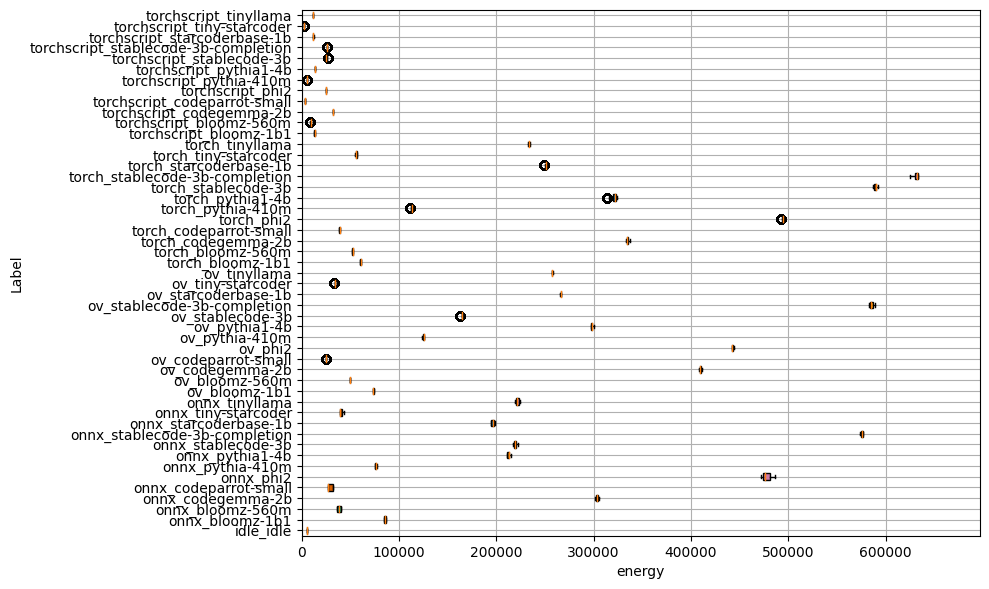

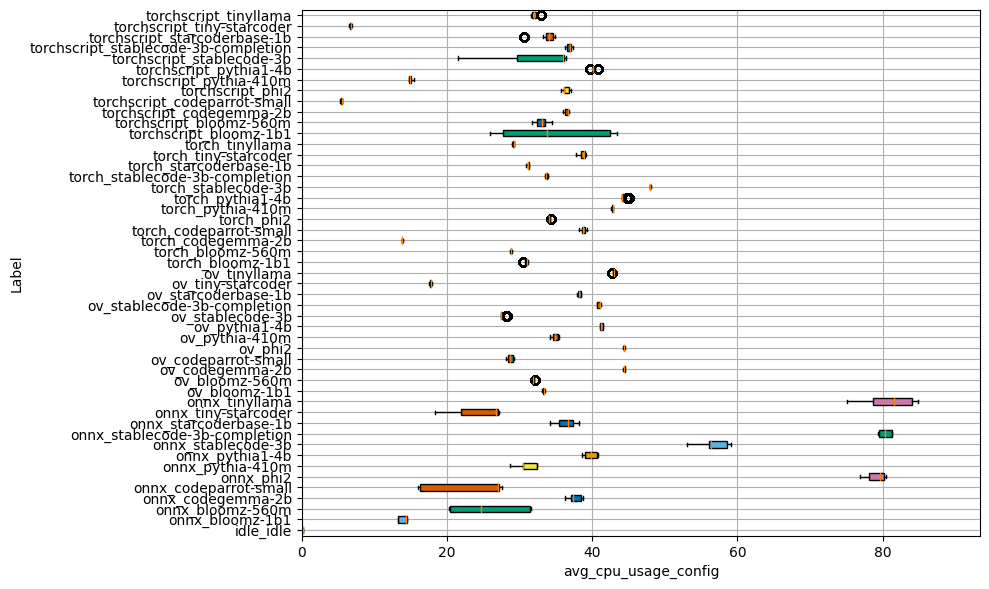

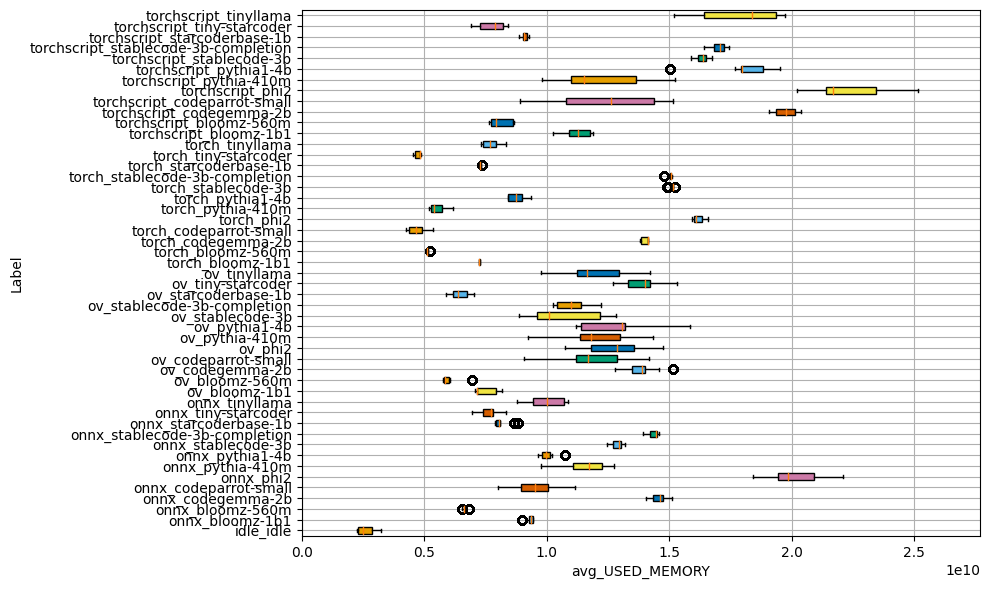

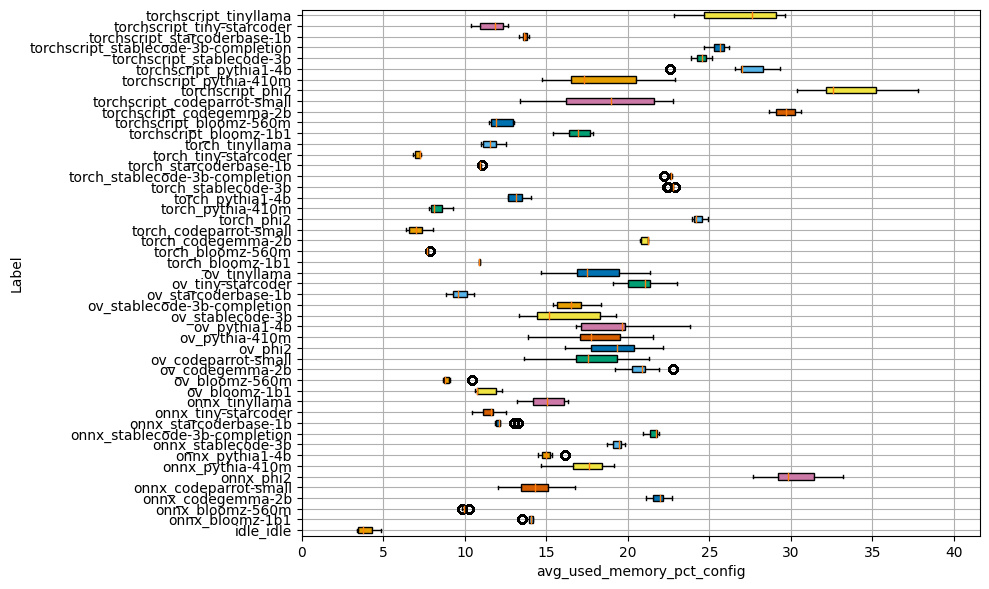

In [83]:

#variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]

variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+"energi_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [84]:
energi_plot.head()

time runtime model  CPU_ENERGY (J)  TOTAL_MEMORY  \
0  2024-06-12 02:19:20.818    idle  idle   849107.627319   66575949824   
1  2024-06-12 02:19:20.818    idle  idle   849107.704010   66575949824   
2  2024-06-12 02:19:21.019    idle  idle   849121.668564   66575949824   
3  2024-06-12 02:19:21.219    idle  idle   849133.591034   66575949824   
4  2024-06-12 02:19:21.419    idle  idle   849145.633667   66575949824   

   TOTAL_SWAP  USED_MEMORY  USED_SWAP  AVG_CPU_USAGE_SAMP      label  \
0  2147479552   2730065920          0            6.485433  idle_idle   
1  2147479552   2730582016          0            6.485433  idle_idle   
2  2147479552   2799267840          0            6.403137  idle_idle   
3  2147479552   2849468416          0            6.403137  idle_idle   
4  2147479552   2896470016          0            5.833782  idle_idle   

   avg_TOTAL_MEMORY  avg_TOTAL_SWAP  avg_USED_MEMORY  avg_USED_SWAP  \
0      6.657595e+10    2.147480e+09     3.243619e+09            0.0   
1      6.657595e+10    2.147480e+09     3.243619e+09            0.0   
2      6.657595e+10    2.147480e+09     3.243619e+09            0.0   
3      6.657595e+10    2.147480e+09     3.243619e+09            0.0   
4      6.657595e+10    2.147480e+09     3.243619e+09            0.0   

   avg_cpu_usage_config       energy  avg_used_memory_pct_config  experiment  
0              0.147192  5513.152359                    4.872058           1  
1              0.147192  5513.152359                    4.872058           1  
2              0.147192  5513.152359                    4.872058           1  
3              0.147192  5513.152359                    4.872058           1  
4              0.147192  5513.152359                    4.872058           1

In [85]:
#variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

resource_energi = energi_plot[['label','experiment',"avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']]

resource_energi

label  experiment  avg_cpu_usage_config  avg_USED_MEMORY  \
0                idle_idle           1              0.147192     3.243619e+09   
1                idle_idle           1              0.147192     3.243619e+09   
2                idle_idle           1              0.147192     3.243619e+09   
3                idle_idle           1              0.147192     3.243619e+09   
4                idle_idle           1              0.147192     3.243619e+09   
...                    ...         ...                   ...              ...   
4108118  ov_tiny-starcoder           9             17.935921     1.332966e+10   
4108119  ov_tiny-starcoder           9             17.935921     1.332966e+10   
4108120  ov_tiny-starcoder           9             17.935921     1.332966e+10   
4108121  ov_tiny-starcoder           9             17.935921     1.332966e+10   
4108122  ov_tiny-starcoder           9             17.935921     1.332966e+10   

         avg_used_memory_pct_config  
0                          4.872058  
1                          4.872058  
2                          4.872058  
3                          4.872058  
4                          4.872058  
...                             ...  
4108118                   20.019797  
4108119                   20.019797  
4108120                   20.019797  
4108121                   20.019797  
4108122                   20.019797  

[4108123 rows x 5 columns]

In [86]:
SAVE_TABLES=True
resource_energi.to_csv(tables_dir+'final_energibridge_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

### CPU usage and Used memory 

In [87]:
resource_energi = resource_energi.drop(columns = ['experiment'])

In [88]:
# Calculate mean values for each label
df = resource_energi
median_resource_energi = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_energi.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_energi

label  avg_cpu_usage_config  \
0                              idle_idle              0.130797   
1                        onnx_bloomz-1b1             14.391370   
2                       onnx_bloomz-560m             24.724446   
3                      onnx_codegemma-2b             37.426418   
4                  onnx_codeparrot-small             27.016334   
5                              onnx_phi2             79.619104   
6                       onnx_pythia-410m             30.478362   
7                        onnx_pythia1-4b             39.844363   
8                     onnx_stablecode-3b             56.355680   
9          onnx_stablecode-3b-completion             80.399708   
10                 onnx_starcoderbase-1b             36.724636   
11                   onnx_tiny-starcoder             26.821532   
12                        onnx_tinyllama             81.593727   
13                         ov_bloomz-1b1             33.338770   
14                        ov_bloomz-560m             31.855885   
15                       ov_codegemma-2b             44.383070   
16                   ov_codeparrot-small             28.739977   
17                               ov_phi2             44.345280   
18                        ov_pythia-410m             34.946671   
19                         ov_pythia1-4b             41.236916   
20                      ov_stablecode-3b             27.457320   
21           ov_stablecode-3b-completion             41.075785   
22                   ov_starcoderbase-1b             38.191981   
23                     ov_tiny-starcoder             17.776064   
24                          ov_tinyllama             42.997680   
25                      torch_bloomz-1b1             30.963056   
26                     torch_bloomz-560m             28.798037   
27                    torch_codegemma-2b             13.821055   
28                torch_codeparrot-small             38.703071   
29                            torch_phi2             34.116910   
30                     torch_pythia-410m             42.836422   
31                      torch_pythia1-4b             44.169499   
32                   torch_stablecode-3b             48.013555   
33        torch_stablecode-3b-completion             33.682233   
34                torch_starcoderbase-1b             31.195492   
35                  torch_tiny-starcoder             38.834112   
36                       torch_tinyllama             29.170391   
37                torchscript_bloomz-1b1             33.714832   
38               torchscript_bloomz-560m             33.080864   
39              torchscript_codegemma-2b             36.642694   
40          torchscript_codeparrot-small              5.483579   
41                      torchscript_phi2             36.184416   
42               torchscript_pythia-410m             14.912778   
43                torchscript_pythia1-4b             40.101432   
44             torchscript_stablecode-3b             35.976160   
45  torchscript_stablecode-3b-completion             36.885262   
46          torchscript_starcoderbase-1b             34.059439   
47            torchscript_tiny-starcoder              6.726320   
48                 torchscript_tinyllama             31.990836   

    avg_USED_MEMORY  avg_used_memory_pct_config  
0      2.501843e+09                    3.757879  
1      9.373613e+09                   14.078213  
2      6.636952e+09                    9.968027  
3      1.461675e+10                   21.952871  
4      9.507387e+09                   14.280513  
5      1.985527e+10                   29.823487  
6      1.173323e+10                   17.623832  
7      9.955764e+09                   14.953995  
8      1.294093e+10                   19.435965  
9      1.447869e+10                   21.745513  
10     8.048105e+09                   12.087435  
11     7.714024e+09                   11.585680  
12     1.000236e+10                   15.023981  
13     7.171461e+09               

In [89]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_energi[['runtime', 'model']] = median_resource_energi['label'].str.split('_', n=1, expand=True)
median_resource_energi

label  avg_cpu_usage_config  \
0                              idle_idle              0.130797   
1                        onnx_bloomz-1b1             14.391370   
2                       onnx_bloomz-560m             24.724446   
3                      onnx_codegemma-2b             37.426418   
4                  onnx_codeparrot-small             27.016334   
5                              onnx_phi2             79.619104   
6                       onnx_pythia-410m             30.478362   
7                        onnx_pythia1-4b             39.844363   
8                     onnx_stablecode-3b             56.355680   
9          onnx_stablecode-3b-completion             80.399708   
10                 onnx_starcoderbase-1b             36.724636   
11                   onnx_tiny-starcoder             26.821532   
12                        onnx_tinyllama             81.593727   
13                         ov_bloomz-1b1             33.338770   
14                        ov_bloomz-560m             31.855885   
15                       ov_codegemma-2b             44.383070   
16                   ov_codeparrot-small             28.739977   
17                               ov_phi2             44.345280   
18                        ov_pythia-410m             34.946671   
19                         ov_pythia1-4b             41.236916   
20                      ov_stablecode-3b             27.457320   
21           ov_stablecode-3b-completion             41.075785   
22                   ov_starcoderbase-1b             38.191981   
23                     ov_tiny-starcoder             17.776064   
24                          ov_tinyllama             42.997680   
25                      torch_bloomz-1b1             30.963056   
26                     torch_bloomz-560m             28.798037   
27                    torch_codegemma-2b             13.821055   
28                torch_codeparrot-small             38.703071   
29                            torch_phi2             34.116910   
30                     torch_pythia-410m             42.836422   
31                      torch_pythia1-4b             44.169499   
32                   torch_stablecode-3b             48.013555   
33        torch_stablecode-3b-completion             33.682233   
34                torch_starcoderbase-1b             31.195492   
35                  torch_tiny-starcoder             38.834112   
36                       torch_tinyllama             29.170391   
37                torchscript_bloomz-1b1             33.714832   
38               torchscript_bloomz-560m             33.080864   
39              torchscript_codegemma-2b             36.642694   
40          torchscript_codeparrot-small              5.483579   
41                      torchscript_phi2             36.184416   
42               torchscript_pythia-410m             14.912778   
43                torchscript_pythia1-4b             40.101432   
44             torchscript_stablecode-3b             35.976160   
45  torchscript_stablecode-3b-completion             36.885262   
46          torchscript_starcoderbase-1b             34.059439   
47            torchscript_tiny-starcoder              6.726320   
48                 torchscript_tinyllama             31.990836   

    avg_USED_MEMORY  avg_used_memory_pct_config      runtime  \
0      2.501843e+09                    3.757879         idle   
1      9.373613e+09                   14.078213         onnx   
2      6.636952e+09                    9.968027         onnx   
3      1.461675e+10                   21.952871         onnx   
4      9.507387e+09                   14.280513         onnx   
5      1.985527e+10                   29.823487         onnx   
6      1.173323e+10                   17.623832         onnx   
7      9.955764e+09                   14.953995         onnx   
8      1.294093e+10                   19.435965         onnx   
9      1.447869e+10                   21.745513         onnx   
10     8.048105e+09           

In [90]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_energi.columns[-2:]) + list(median_resource_energi.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_energi = median_resource_energi[new_order]
median_resource_energi

runtime                     model  \
0          idle                      idle   
1          onnx                bloomz-1b1   
2          onnx               bloomz-560m   
3          onnx              codegemma-2b   
4          onnx          codeparrot-small   
5          onnx                      phi2   
6          onnx               pythia-410m   
7          onnx                pythia1-4b   
8          onnx             stablecode-3b   
9          onnx  stablecode-3b-completion   
10         onnx          starcoderbase-1b   
11         onnx            tiny-starcoder   
12         onnx                 tinyllama   
13           ov                bloomz-1b1   
14           ov               bloomz-560m   
15           ov              codegemma-2b   
16           ov          codeparrot-small   
17           ov                      phi2   
18           ov               pythia-410m   
19           ov                pythia1-4b   
20           ov             stablecode-3b   
21           ov  stablecode-3b-completion   
22           ov          starcoderbase-1b   
23           ov            tiny-starcoder   
24           ov                 tinyllama   
25        torch                bloomz-1b1   
26        torch               bloomz-560m   
27        torch              codegemma-2b   
28        torch          codeparrot-small   
29        torch                      phi2   
30        torch               pythia-410m   
31        torch                pythia1-4b   
32        torch             stablecode-3b   
33        torch  stablecode-3b-completion   
34        torch          starcoderbase-1b   
35        torch            tiny-starcoder   
36        torch                 tinyllama   
37  torchscript                bloomz-1b1   
38  torchscript               bloomz-560m   
39  torchscript              codegemma-2b   
40  torchscript          codeparrot-small   
41  torchscript                      phi2   
42  torchscript               pythia-410m   
43  torchscript                pythia1-4b   
44  torchscript             stablecode-3b   
45  torchscript  stablecode-3b-completion   
46  torchscript          starcoderbase-1b   
47  torchscript            tiny-starcoder   
48  torchscript                 tinyllama   

                                   label  avg_cpu_usage_config  \
0                              idle_idle              0.130797   
1                        onnx_bloomz-1b1             14.391370   
2                       onnx_bloomz-560m             24.724446   
3                      onnx_codegemma-2b             37.426418   
4                  onnx_codeparrot-small             27.016334   
5                              onnx_phi2             79.619104   
6                       onnx_pythia-410m             30.478362   
7                        onnx_pythia1-4b             39.844363   
8                     onnx_stablecode-3b             56.355680   
9          onnx_stablecode-3b-completion             80.399708   
10                 onnx_starcoderbase-1b             36.724636   
11                   onnx_tiny-starcoder             26.821532   
12                        onnx_tinyllama             81.593727   
13                         ov_bloomz-1b1             33.338770   
14                        ov_bloomz-560m             31.855885   
15                       ov_codegemma-2b             44.383070   
16                   ov_codeparrot-small             28.739977   
17                               ov_phi2             44.345280   
18                        ov_pythia-410m             34.946671   
19                         ov_pythia1-4b             41.236916   
20                      ov_stablecode-3b             27.457320   
21           ov_stablecode-3b-completion             41.075785   
22                   ov_starcoderbase-1b             38.191981   
23                     ov_tiny-starcoder             17.776064   
24                          ov_tinyllama             42.997680   
25                      torch_bloomz-1b1 

In [91]:
median_resource_energi.to_csv(tables_dir+'median_resource_energi.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [92]:
median_resource_energi = median_resource_energi.drop(columns = ['label'])


In [93]:
filename = tables_dir + 'median_resource_energi.tex'
save_latex_table(median_resource_energi,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & avg cpu usage config & avg USED MEMORY & avg used memory pct config \\
\midrule
idle & idle & 0.130797 & 2501843457.365334 & 3.757879 \\
onnx & bloomz-1b1 & 14.391370 & 9373613019.173843 & 14.078213 \\
onnx & bloomz-560m & 24.724446 & 6636952177.429216 & 9.968027 \\
onnx & codegemma-2b & 37.426418 & 14616749641.697170 & 21.952871 \\
onnx & codeparrot-small & 27.016334 & 9507387324.752239 & 14.280513 \\
onnx & phi2 & 79.619104 & 19855269989.459709 & 29.823487 \\
onnx & pythia-410m & 30.478362 & 11733233622.464331 & 17.623832 \\
onnx & pythia1-4b & 39.844363 & 9955763999.596184 & 14.953995 \\
onnx & stablecode-3b & 56.355680 & 12940932866.691511 & 19.435965 \\
onnx & stablecode-3b-completion & 80.399708 & 14478685367.712231 & 21.745513 \\
onnx & starcoderbase-1b & 36.724636 & 8048104676.481808 & 12.087435 \\
onnx & tiny-starcoder & 26.821532 & 7714024164.294373 & 11.585680 \\
onnx & tinyllama & 81.593727 & 10002357854.479324 & 15.023981 \

In [94]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_energi.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_energi.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

## Resource utilization: Nvidia: 

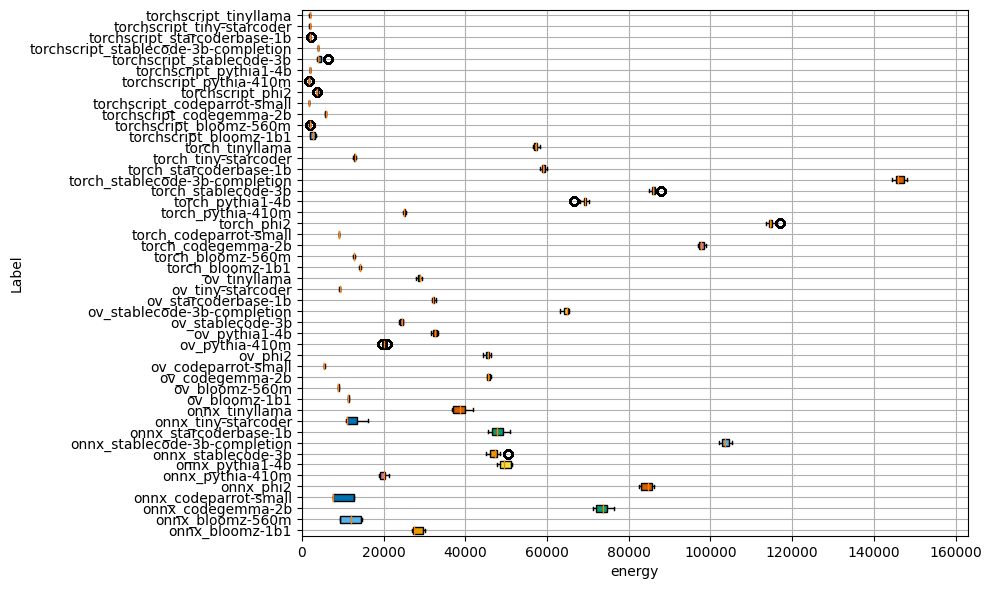

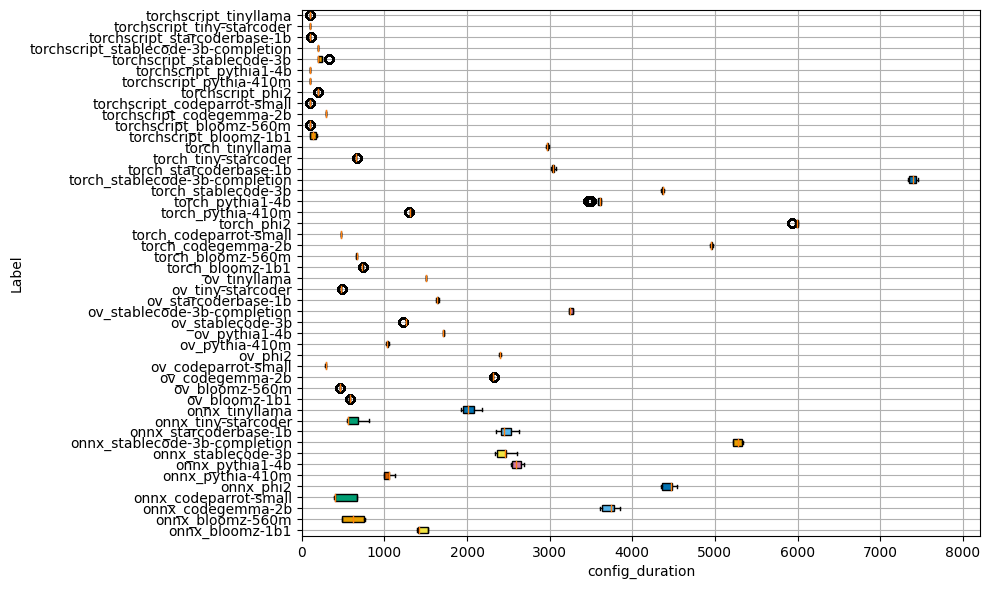

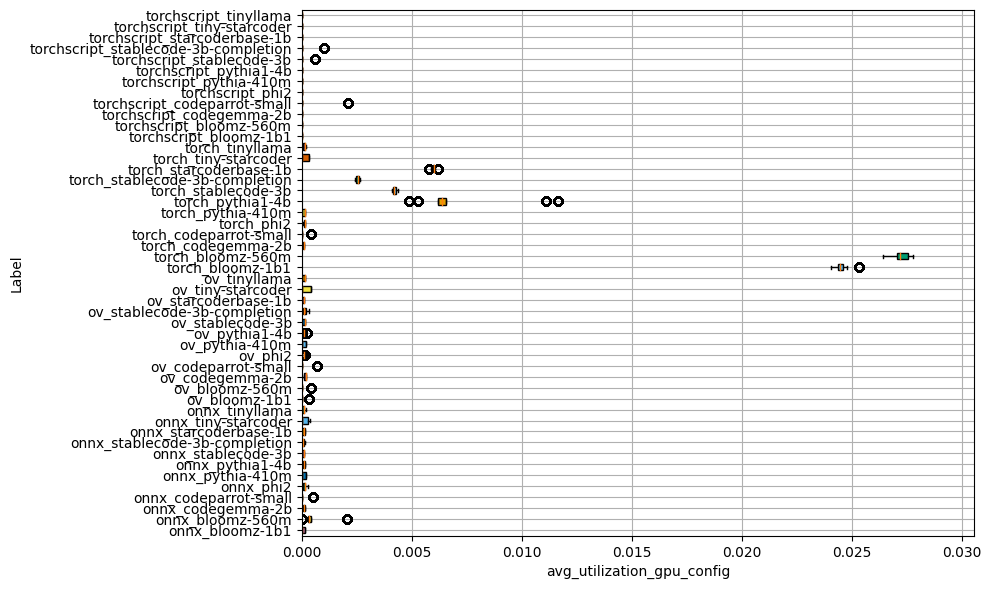

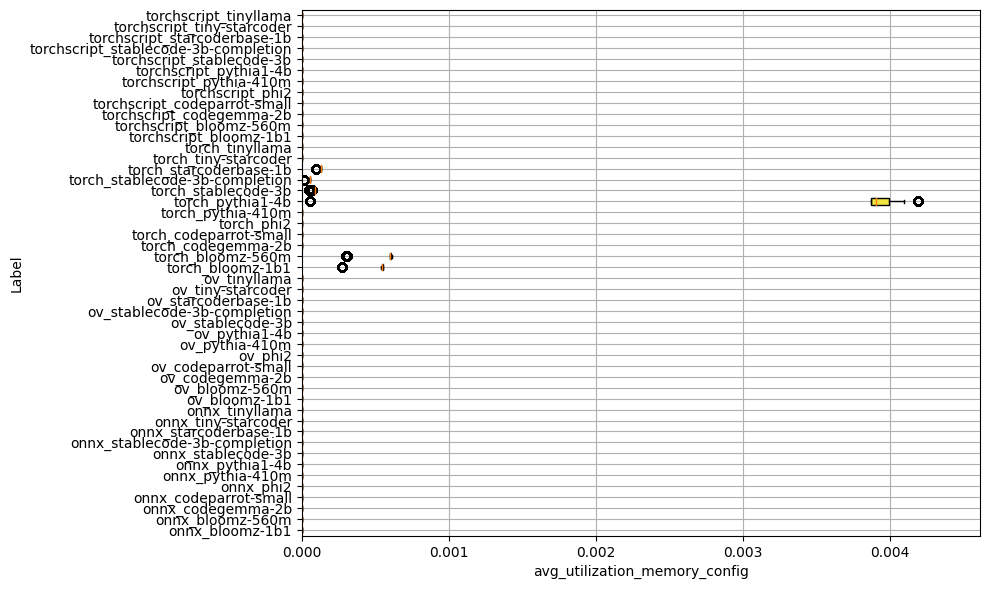

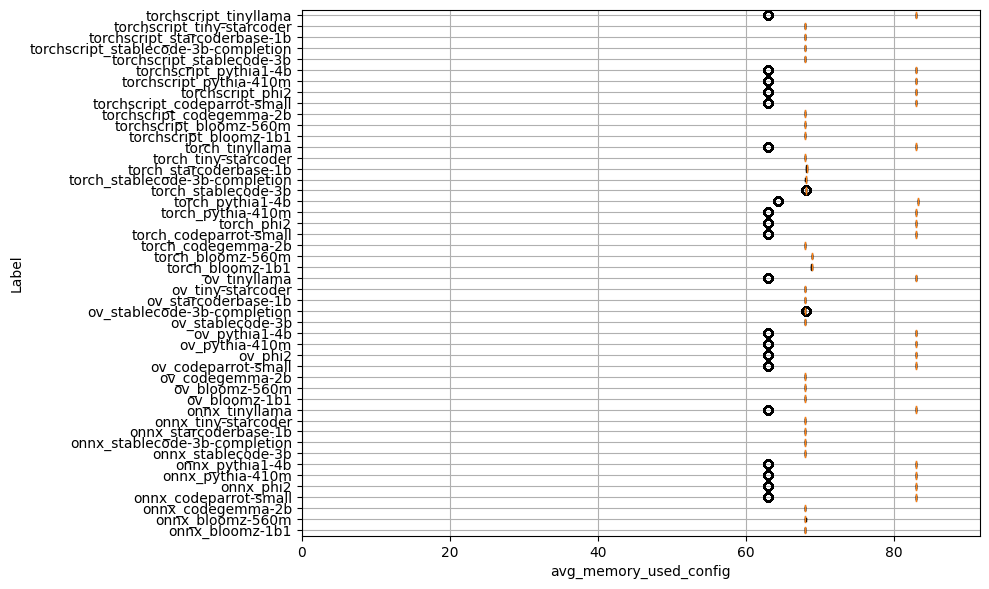

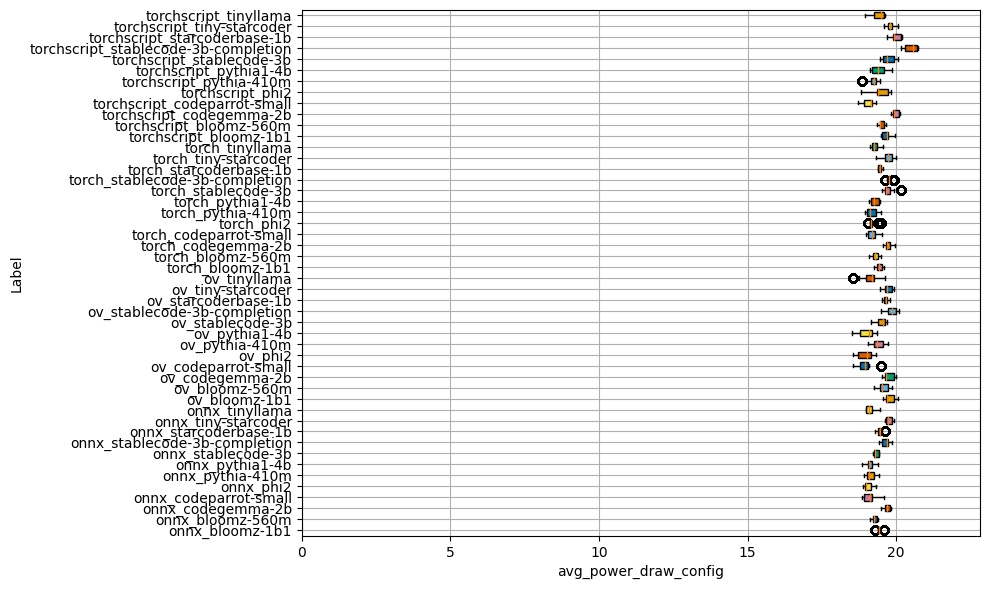

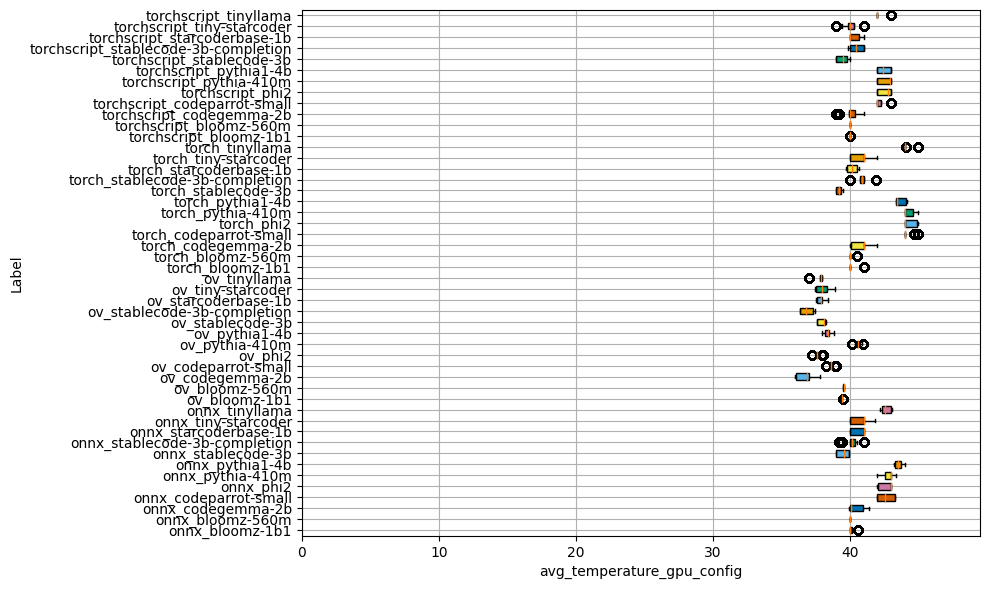

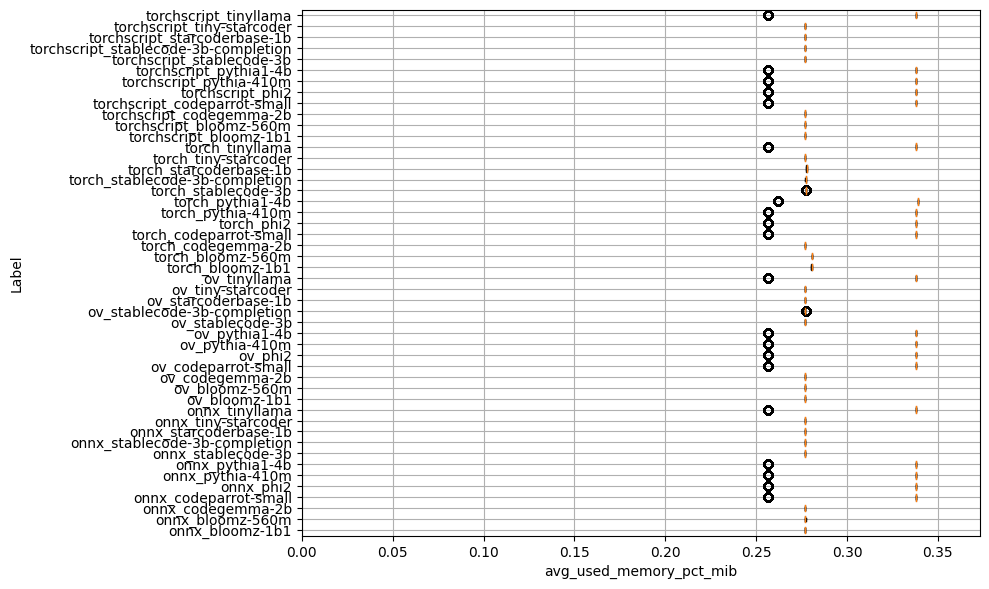

In [95]:
variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]',
                     'Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']

variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']


# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "nvidia_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


In [96]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [97]:
resource_nvidia = nvidia_plot[['label','experiment','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']]
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
#variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
#                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']
resource_nvidia

label  experiment  config_duration  \
0         torch_pythia1-4b           1         3466.257   
1         torch_pythia1-4b           1         3466.257   
2         torch_pythia1-4b           1         3466.257   
3         torch_pythia1-4b           1         3466.257   
4         torch_pythia1-4b           1         3466.257   
...                    ...         ...              ...   
8129279  ov_tiny-starcoder           9          472.014   
8129280  ov_tiny-starcoder           9          472.014   
8129281  ov_tiny-starcoder           9          472.014   
8129282  ov_tiny-starcoder           9          472.014   
8129283  ov_tiny-starcoder           9          472.014   

         avg_utilization_gpu_config  avg_utilization_memory_config  \
0                          0.005282                       0.000058   
1                          0.005282                       0.000058   
2                          0.005282                       0.000058   
3                          0.005282                       0.000058   
4                          0.005282                       0.000058   
...                             ...                            ...   
8129279                    0.000000                       0.000000   
8129280                    0.000000                       0.000000   
8129281                    0.000000                       0.000000   
8129282                    0.000000                       0.000000   
8129283                    0.000000                       0.000000   

         avg_memory_used_config  avg_power_draw_config  \
0                     83.304312              19.191973   
1                     83.304312              19.191973   
2                     83.304312              19.191973   
3                     83.304312              19.191973   
4                     83.304312              19.191973   
...                         ...                    ...   
8129279               68.000000              19.680962   
8129280               68.000000              19.680962   
8129281               68.000000              19.680962   
8129282               68.000000              19.680962   
8129283               68.000000              19.680962   

         avg_temperature_gpu_config  avg_used_memory_pct_mib  
0                          44.11115                 0.339132  
1                          44.11115                 0.339132  
2                          44.11115                 0.339132  
3                          44.11115                 0.339132  
4                          44.11115                 0.339132  
...                             ...                      ...  
8129279                    37.52891                 0.276828  
8129280                    37.52891                 0.276828  
8129281                    37.52891                 0.276828  
8129282                    37.52891                 0.276828  
8129283                    37.52891                 0.276828  

[8129284 rows x 9 columns]

In [98]:
resource_nvidia.to_csv(tables_dir+'final_nvidia_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [99]:
resource_nvidia = resource_nvidia.drop(columns = ['experiment'])

In [100]:
# Calculate mean values for each label
df = resource_nvidia
median_resource_nvidia = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_nvidia.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_nvidia

label  config_duration  \
0                        onnx_bloomz-1b1         1414.307   
1                       onnx_bloomz-560m          621.507   
2                      onnx_codegemma-2b         3743.842   
3                  onnx_codeparrot-small          402.181   
4                              onnx_phi2         4470.892   
5                       onnx_pythia-410m         1055.912   
6                        onnx_pythia1-4b         2595.709   
7                     onnx_stablecode-3b         2454.282   
8          onnx_stablecode-3b-completion         5279.872   
9                  onnx_starcoderbase-1b         2446.439   
10                   onnx_tiny-starcoder          556.561   
11                        onnx_tinyllama         2017.491   
12                         ov_bloomz-1b1          577.941   
13                        ov_bloomz-560m          458.526   
14                       ov_codegemma-2b         2313.741   
15                   ov_codeparrot-small          287.735   
16                               ov_phi2         2396.038   
17                        ov_pythia-410m         1036.357   
18                         ov_pythia1-4b         1708.428   
19                      ov_stablecode-3b         1262.056   
20           ov_stablecode-3b-completion         3244.907   
21                   ov_starcoderbase-1b         1641.437   
22                     ov_tiny-starcoder          473.701   
23                          ov_tinyllama         1502.977   
24                      torch_bloomz-1b1          734.056   
25                     torch_bloomz-560m          662.719   
26                    torch_codegemma-2b         4957.215   
27                torch_codeparrot-small          473.368   
28                            torch_phi2         5990.113   
29                     torch_pythia-410m         1308.546   
30                      torch_pythia1-4b         3613.052   
31                   torch_stablecode-3b         4366.010   
32        torch_stablecode-3b-completion         7399.587   
33                torch_starcoderbase-1b         3038.608   
34                  torch_tiny-starcoder          655.418   
35                       torch_tinyllama         2966.751   
36                torchscript_bloomz-1b1          138.181   
37               torchscript_bloomz-560m           97.529   
38              torchscript_codegemma-2b          291.835   
39          torchscript_codeparrot-small           95.932   
40                      torchscript_phi2          196.055   
41               torchscript_pythia-410m           96.249   
42                torchscript_pythia1-4b           99.765   
43             torchscript_stablecode-3b          196.580   
44  torchscript_stablecode-3b-completion          195.913   
45          torchscript_starcoderbase-1b           98.135   
46            torchscript_tiny-starcoder           96.372   
47                 torchscript_tinyllama           98.248   

    avg_utilization_gpu_config  avg_utilization_memory_config  \
0                     0.000000                       0.000000   
1                     0.000324                       0.000000   
2                     0.000107                       0.000000   
3                     0.000000                       0.000000   
4                     0.000135                       0.000000   
5                     0.000000                       0.000000   
6                     0.000079                       0.000000   
7                     0.000080                       0.000000   
8                     0.000078                       0.000000   
9                     0.000084                       0.000000   
10                    0.000000                       0.000000   
11                    0.000097                       0.000000   
12                    0.000000                       0.000000   
13                    0.000000                       0.000000   
14                    0.000174                       0.000000   
15   

In [101]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_nvidia[['runtime', 'model']] = median_resource_nvidia['label'].str.split('_', n=1, expand=True)
median_resource_nvidia

label  config_duration  \
0                        onnx_bloomz-1b1         1414.307   
1                       onnx_bloomz-560m          621.507   
2                      onnx_codegemma-2b         3743.842   
3                  onnx_codeparrot-small          402.181   
4                              onnx_phi2         4470.892   
5                       onnx_pythia-410m         1055.912   
6                        onnx_pythia1-4b         2595.709   
7                     onnx_stablecode-3b         2454.282   
8          onnx_stablecode-3b-completion         5279.872   
9                  onnx_starcoderbase-1b         2446.439   
10                   onnx_tiny-starcoder          556.561   
11                        onnx_tinyllama         2017.491   
12                         ov_bloomz-1b1          577.941   
13                        ov_bloomz-560m          458.526   
14                       ov_codegemma-2b         2313.741   
15                   ov_codeparrot-small          287.735   
16                               ov_phi2         2396.038   
17                        ov_pythia-410m         1036.357   
18                         ov_pythia1-4b         1708.428   
19                      ov_stablecode-3b         1262.056   
20           ov_stablecode-3b-completion         3244.907   
21                   ov_starcoderbase-1b         1641.437   
22                     ov_tiny-starcoder          473.701   
23                          ov_tinyllama         1502.977   
24                      torch_bloomz-1b1          734.056   
25                     torch_bloomz-560m          662.719   
26                    torch_codegemma-2b         4957.215   
27                torch_codeparrot-small          473.368   
28                            torch_phi2         5990.113   
29                     torch_pythia-410m         1308.546   
30                      torch_pythia1-4b         3613.052   
31                   torch_stablecode-3b         4366.010   
32        torch_stablecode-3b-completion         7399.587   
33                torch_starcoderbase-1b         3038.608   
34                  torch_tiny-starcoder          655.418   
35                       torch_tinyllama         2966.751   
36                torchscript_bloomz-1b1          138.181   
37               torchscript_bloomz-560m           97.529   
38              torchscript_codegemma-2b          291.835   
39          torchscript_codeparrot-small           95.932   
40                      torchscript_phi2          196.055   
41               torchscript_pythia-410m           96.249   
42                torchscript_pythia1-4b           99.765   
43             torchscript_stablecode-3b          196.580   
44  torchscript_stablecode-3b-completion          195.913   
45          torchscript_starcoderbase-1b           98.135   
46            torchscript_tiny-starcoder           96.372   
47                 torchscript_tinyllama           98.248   

    avg_utilization_gpu_config  avg_utilization_memory_config  \
0                     0.000000                       0.000000   
1                     0.000324                       0.000000   
2                     0.000107                       0.000000   
3                     0.000000                       0.000000   
4                     0.000135                       0.000000   
5                     0.000000                       0.000000   
6                     0.000079                       0.000000   
7                     0.000080                       0.000000   
8                     0.000078                       0.000000   
9                     0.000084                       0.000000   
10                    0.000000                       0.000000   
11                    0.000097                       0.000000   
12                    0.000000                       0.000000   
13                    0.000000                       0.000000   
14                    0.000174                       0.000000   
15   

In [102]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_nvidia.columns[-2:]) + list(median_resource_nvidia.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_nvidia = median_resource_nvidia[new_order]
median_resource_nvidia

runtime                     model  \
0          onnx                bloomz-1b1   
1          onnx               bloomz-560m   
2          onnx              codegemma-2b   
3          onnx          codeparrot-small   
4          onnx                      phi2   
5          onnx               pythia-410m   
6          onnx                pythia1-4b   
7          onnx             stablecode-3b   
8          onnx  stablecode-3b-completion   
9          onnx          starcoderbase-1b   
10         onnx            tiny-starcoder   
11         onnx                 tinyllama   
12           ov                bloomz-1b1   
13           ov               bloomz-560m   
14           ov              codegemma-2b   
15           ov          codeparrot-small   
16           ov                      phi2   
17           ov               pythia-410m   
18           ov                pythia1-4b   
19           ov             stablecode-3b   
20           ov  stablecode-3b-completion   
21           ov          starcoderbase-1b   
22           ov            tiny-starcoder   
23           ov                 tinyllama   
24        torch                bloomz-1b1   
25        torch               bloomz-560m   
26        torch              codegemma-2b   
27        torch          codeparrot-small   
28        torch                      phi2   
29        torch               pythia-410m   
30        torch                pythia1-4b   
31        torch             stablecode-3b   
32        torch  stablecode-3b-completion   
33        torch          starcoderbase-1b   
34        torch            tiny-starcoder   
35        torch                 tinyllama   
36  torchscript                bloomz-1b1   
37  torchscript               bloomz-560m   
38  torchscript              codegemma-2b   
39  torchscript          codeparrot-small   
40  torchscript                      phi2   
41  torchscript               pythia-410m   
42  torchscript                pythia1-4b   
43  torchscript             stablecode-3b   
44  torchscript  stablecode-3b-completion   
45  torchscript          starcoderbase-1b   
46  torchscript            tiny-starcoder   
47  torchscript                 tinyllama   

                                   label  config_duration  \
0                        onnx_bloomz-1b1         1414.307   
1                       onnx_bloomz-560m          621.507   
2                      onnx_codegemma-2b         3743.842   
3                  onnx_codeparrot-small          402.181   
4                              onnx_phi2         4470.892   
5                       onnx_pythia-410m         1055.912   
6                        onnx_pythia1-4b         2595.709   
7                     onnx_stablecode-3b         2454.282   
8          onnx_stablecode-3b-completion         5279.872   
9                  onnx_starcoderbase-1b         2446.439   
10                   onnx_tiny-starcoder          556.561   
11                        onnx_tinyllama         2017.491   
12                         ov_bloomz-1b1          577.941   
13                        ov_bloomz-560m          458.526   
14                       ov_codegemma-2b         2313.741   
15                   ov_codeparrot-small          287.735   
16                               ov_phi2         2396.038   
17                        ov_pythia-410m         1036.357   
18                         ov_pythia1-4b         1708.428   
19                      ov_stablecode-3b         1262.056   
20           ov_stablecode-3b-completion         3244.907   
21                   ov_starcoderbase-1b         1641.437   
22                     ov_tiny-starcoder          473.701   
23                          ov_tinyllama         1502.977   
24                      torch_bloomz-1b1          734.056   
25                     torch_bloomz-560m          662.719   
26                    torch_codegemma-2b         4957.215   
27                torch_codeparrot-small          473.368   
28                            tor

In [103]:
median_resource_nvidia.to_csv(tables_dir+'median_resource_nvidia.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [104]:
median_resource_nvidia = median_resource_nvidia.drop(columns = ['label'])


In [105]:
filename = tables_dir + 'median_resource_nvidia.tex'
save_latex_table(median_resource_nvidia,filename)

\begin{tabular}{llrrrrrrr}
\toprule
runtime & model & config duration & avg utilization gpu config & avg utilization memory config & avg memory used config & avg power draw config & avg temperature gpu config & avg used memory pct mib \\
\midrule
onnx & bloomz-1b1 & 1414.307000 & 0.000000 & 0.000000 & 68.000000 & 19.426285 & 40.000000 & 0.276828 \\
onnx & bloomz-560m & 621.507000 & 0.000324 & 0.000000 & 68.000000 & 19.258573 & 40.000000 & 0.276828 \\
onnx & codegemma-2b & 3743.842000 & 0.000107 & 0.000000 & 68.000000 & 19.677947 & 40.059146 & 0.276828 \\
onnx & codeparrot-small & 402.181000 & 0.000000 & 0.000000 & 83.000000 & 19.133810 & 42.568295 & 0.337893 \\
onnx & phi2 & 4470.892000 & 0.000135 & 0.000000 & 83.000000 & 18.994181 & 42.999933 & 0.337893 \\
onnx & pythia-410m & 1055.912000 & 0.000000 & 0.000000 & 83.000000 & 19.091516 & 43.000000 & 0.337893 \\
onnx & pythia1-4b & 2595.709000 & 0.000079 & 0.000000 & 83.000000 & 19.083839 & 43.546612 & 0.337893 \\
onnx & stablecode-3b & 

In [106]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_nvidia.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_nvidia.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)

# # Print LaTeX table
# print(latex_table)

## Other: Wattmeter: 'Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]'

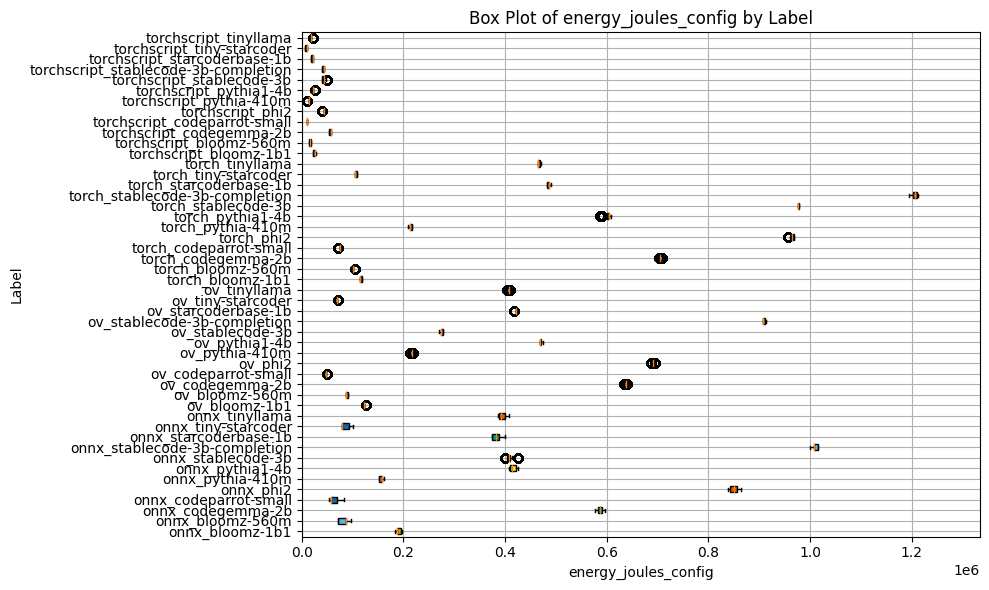

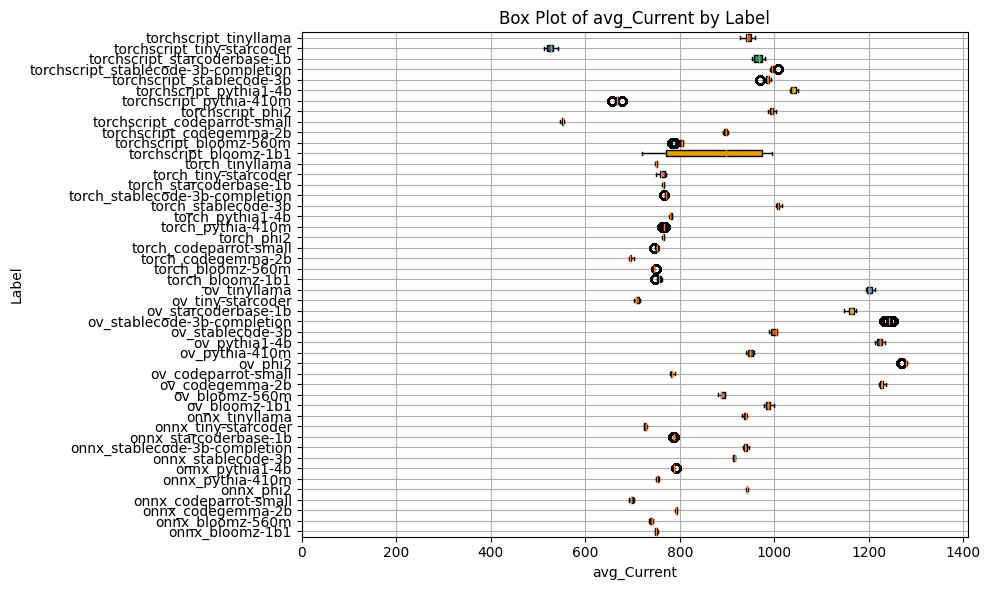

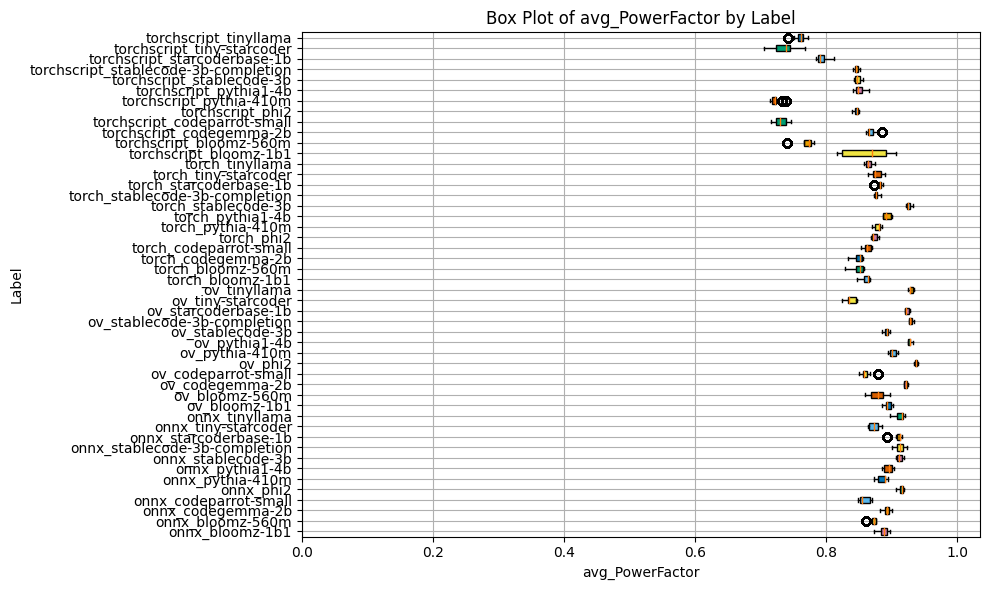

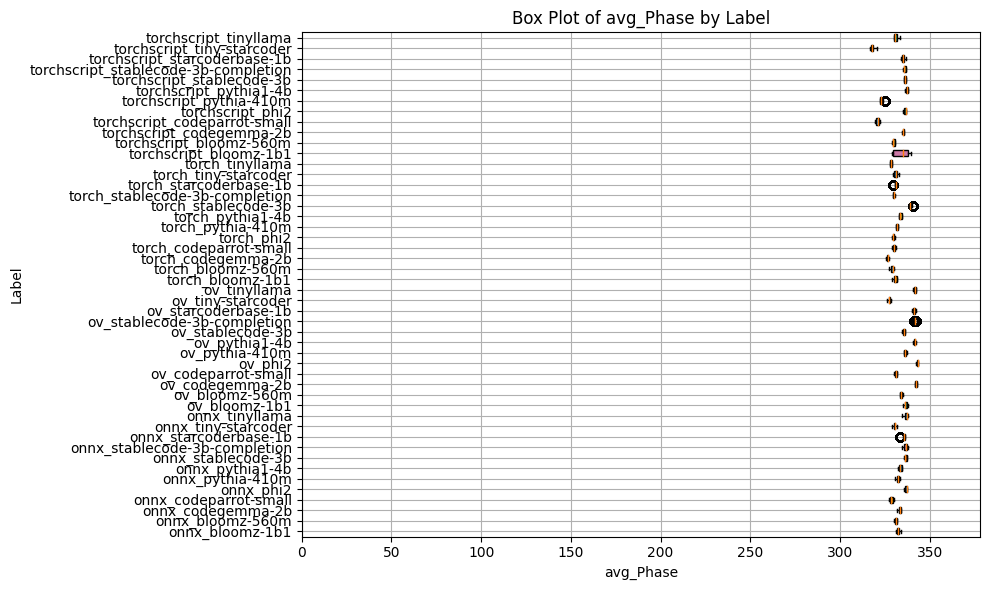

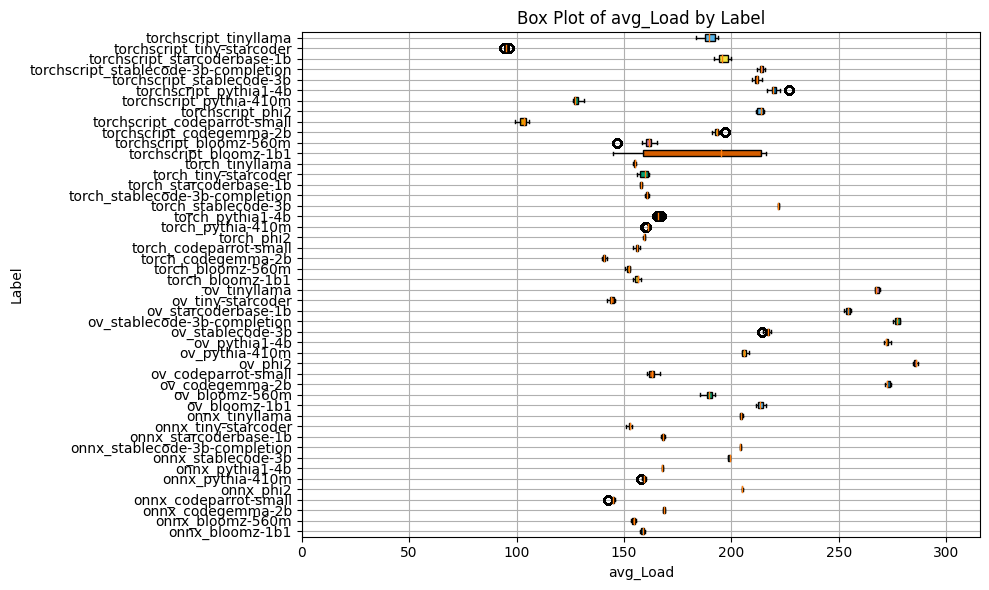

In [107]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir + "wattmeter_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [108]:
wattmeter_plot.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [109]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
#variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

resource_wattmeter = wattmeter_plot[['label','experiment','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']]
resource_wattmeter

label  experiment  avg_Current  avg_PowerFactor  \
0         torch_pythia1-4b           1   784.274255         0.900857   
1         torch_pythia1-4b           1   784.274255         0.900857   
2         torch_pythia1-4b           1   784.274255         0.900857   
3         torch_pythia1-4b           1   784.274255         0.900857   
4         torch_pythia1-4b           1   784.274255         0.900857   
...                    ...         ...          ...              ...   
1283135  ov_tiny-starcoder           9   709.761963         0.845926   
1283136  ov_tiny-starcoder           9   709.761963         0.845926   
1283137  ov_tiny-starcoder           9   709.761963         0.845926   
1283138  ov_tiny-starcoder           9   709.761963         0.845926   
1283139  ov_tiny-starcoder           9   709.761963         0.845926   

          avg_Phase    avg_Load  
0        334.525908  167.053919  
1        334.525908  167.053919  
2        334.525908  167.053919  
3        334.525908  167.053919  
4        334.525908  167.053919  
...             ...         ...  
1283135  328.234025  143.872393  
1283136  328.234025  143.872393  
1283137  328.234025  143.872393  
1283138  328.234025  143.872393  
1283139  328.234025  143.872393  

[1283140 rows x 6 columns]

In [110]:
resource_wattmeter.to_csv(tables_dir+'final_wattmeter_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [111]:
resource_wattmeter = resource_wattmeter.drop(columns = ['experiment'])

In [112]:
# Calculate mean values for each label
df = resource_wattmeter
median_resource_wattmeter = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_wattmeter.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_wattmeter

label  avg_Current  avg_PowerFactor  \
0                        onnx_bloomz-1b1   749.890454         0.887382   
1                       onnx_bloomz-560m   740.473770         0.873476   
2                      onnx_codegemma-2b   792.475669         0.892246   
3                  onnx_codeparrot-small   697.511156         0.853851   
4                              onnx_phi2   942.306588         0.915601   
5                       onnx_pythia-410m   752.164035         0.889007   
6                        onnx_pythia1-4b   788.134774         0.896344   
7                     onnx_stablecode-3b   916.290871         0.911353   
8          onnx_stablecode-3b-completion   938.426856         0.911854   
9                  onnx_starcoderbase-1b   787.891802         0.912068   
10                   onnx_tiny-starcoder   727.901431         0.872263   
11                        onnx_tinyllama   939.534110         0.915516   
12                         ov_bloomz-1b1   986.910136         0.893281   
13                        ov_bloomz-560m   888.262548         0.879277   
14                       ov_codegemma-2b  1228.932864         0.921930   
15                   ov_codeparrot-small   784.195122         0.856799   
16                               ov_phi2  1278.294884         0.936150   
17                        ov_pythia-410m   948.456208         0.900797   
18                         ov_pythia1-4b  1223.770869         0.927178   
19                      ov_stablecode-3b  1002.941855         0.891926   
20           ov_stablecode-3b-completion  1242.815817         0.928301   
21                   ov_starcoderbase-1b  1163.334511         0.922114   
22                     ov_tiny-starcoder   707.337423         0.834847   
23                          ov_tinyllama  1200.780008         0.927865   
24                      torch_bloomz-1b1   756.276161         0.863428   
25                     torch_bloomz-560m   745.578716         0.852145   
26                    torch_codegemma-2b   694.677048         0.851950   
27                torch_codeparrot-small   752.466463         0.861585   
28                            torch_phi2   764.376671         0.871203   
29                     torch_pythia-410m   765.935271         0.880356   
30                      torch_pythia1-4b   780.388880         0.891475   
31                   torch_stablecode-3b  1008.232478         0.924779   
32        torch_stablecode-3b-completion   770.271082         0.875930   
33                torch_starcoderbase-1b   764.066279         0.882163   
34                  torch_tiny-starcoder   760.621145         0.874453   
35                       torch_tinyllama   749.300019         0.864208   
36                torchscript_bloomz-1b1   899.000000         0.870335   
37               torchscript_bloomz-560m   804.560976         0.773506   
38              torchscript_codegemma-2b   898.716463         0.865681   
39          torchscript_codeparrot-small   552.344512         0.729329   
40                      torchscript_phi2   995.707317         0.847530   
41               torchscript_pythia-410m   666.451220         0.721189   
42                torchscript_pythia1-4b  1040.533133         0.848855   
43             torchscript_stablecode-3b   986.521341         0.846220   
44  torchscript_stablecode-3b-completion   995.951220         0.845015   
45          torchscript_starcoderbase-1b   967.167683         0.790640   
46            torchscript_tiny-starcoder   527.844512         0.737988   
47                 torchscript_tinyllama   943.463415         0.761524   

     avg_Phase    avg_Load  
0   332.566514  158.964006  
1   331.055488  154.692182  
2   333.270883  168.562461  
3   328.431351  145.048980  
4   337.194537  205.108937  
5   332.497417  159.360281  
6   333.744308  167.935429  
7   336.539996  199.213196  
8   336.645666  204.225267  
9   335.901163  168.249917  
10  330.702873  152.779715  
11  337.313600  204.472497  
12  336.498797  213.437370  
13

In [113]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_wattmeter[['runtime', 'model']] = median_resource_wattmeter['label'].str.split('_', n=1, expand=True)
median_resource_wattmeter

label  avg_Current  avg_PowerFactor  \
0                        onnx_bloomz-1b1   749.890454         0.887382   
1                       onnx_bloomz-560m   740.473770         0.873476   
2                      onnx_codegemma-2b   792.475669         0.892246   
3                  onnx_codeparrot-small   697.511156         0.853851   
4                              onnx_phi2   942.306588         0.915601   
5                       onnx_pythia-410m   752.164035         0.889007   
6                        onnx_pythia1-4b   788.134774         0.896344   
7                     onnx_stablecode-3b   916.290871         0.911353   
8          onnx_stablecode-3b-completion   938.426856         0.911854   
9                  onnx_starcoderbase-1b   787.891802         0.912068   
10                   onnx_tiny-starcoder   727.901431         0.872263   
11                        onnx_tinyllama   939.534110         0.915516   
12                         ov_bloomz-1b1   986.910136         0.893281   
13                        ov_bloomz-560m   888.262548         0.879277   
14                       ov_codegemma-2b  1228.932864         0.921930   
15                   ov_codeparrot-small   784.195122         0.856799   
16                               ov_phi2  1278.294884         0.936150   
17                        ov_pythia-410m   948.456208         0.900797   
18                         ov_pythia1-4b  1223.770869         0.927178   
19                      ov_stablecode-3b  1002.941855         0.891926   
20           ov_stablecode-3b-completion  1242.815817         0.928301   
21                   ov_starcoderbase-1b  1163.334511         0.922114   
22                     ov_tiny-starcoder   707.337423         0.834847   
23                          ov_tinyllama  1200.780008         0.927865   
24                      torch_bloomz-1b1   756.276161         0.863428   
25                     torch_bloomz-560m   745.578716         0.852145   
26                    torch_codegemma-2b   694.677048         0.851950   
27                torch_codeparrot-small   752.466463         0.861585   
28                            torch_phi2   764.376671         0.871203   
29                     torch_pythia-410m   765.935271         0.880356   
30                      torch_pythia1-4b   780.388880         0.891475   
31                   torch_stablecode-3b  1008.232478         0.924779   
32        torch_stablecode-3b-completion   770.271082         0.875930   
33                torch_starcoderbase-1b   764.066279         0.882163   
34                  torch_tiny-starcoder   760.621145         0.874453   
35                       torch_tinyllama   749.300019         0.864208   
36                torchscript_bloomz-1b1   899.000000         0.870335   
37               torchscript_bloomz-560m   804.560976         0.773506   
38              torchscript_codegemma-2b   898.716463         0.865681   
39          torchscript_codeparrot-small   552.344512         0.729329   
40                      torchscript_phi2   995.707317         0.847530   
41               torchscript_pythia-410m   666.451220         0.721189   
42                torchscript_pythia1-4b  1040.533133         0.848855   
43             torchscript_stablecode-3b   986.521341         0.846220   
44  torchscript_stablecode-3b-completion   995.951220         0.845015   
45          torchscript_starcoderbase-1b   967.167683         0.790640   
46            torchscript_tiny-starcoder   527.844512         0.737988   
47                 torchscript_tinyllama   943.463415         0.761524   

     avg_Phase    avg_Load      runtime                     model  
0   332.566514  158.964006         onnx                bloomz-1b1  
1   331.055488  154.692182         onnx               bloomz-560m  
2   333.270883  168.562461         onnx              codegemma-2b  
3   328.431351  145.048980         onnx          codeparrot-small  
4   337.194537  205.108937         onnx                      phi2  


In [114]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_wattmeter.columns[-2:]) + list(median_resource_wattmeter.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_wattmeter = median_resource_wattmeter[new_order]
median_resource_wattmeter

runtime                     model  \
0          onnx                bloomz-1b1   
1          onnx               bloomz-560m   
2          onnx              codegemma-2b   
3          onnx          codeparrot-small   
4          onnx                      phi2   
5          onnx               pythia-410m   
6          onnx                pythia1-4b   
7          onnx             stablecode-3b   
8          onnx  stablecode-3b-completion   
9          onnx          starcoderbase-1b   
10         onnx            tiny-starcoder   
11         onnx                 tinyllama   
12           ov                bloomz-1b1   
13           ov               bloomz-560m   
14           ov              codegemma-2b   
15           ov          codeparrot-small   
16           ov                      phi2   
17           ov               pythia-410m   
18           ov                pythia1-4b   
19           ov             stablecode-3b   
20           ov  stablecode-3b-completion   
21           ov          starcoderbase-1b   
22           ov            tiny-starcoder   
23           ov                 tinyllama   
24        torch                bloomz-1b1   
25        torch               bloomz-560m   
26        torch              codegemma-2b   
27        torch          codeparrot-small   
28        torch                      phi2   
29        torch               pythia-410m   
30        torch                pythia1-4b   
31        torch             stablecode-3b   
32        torch  stablecode-3b-completion   
33        torch          starcoderbase-1b   
34        torch            tiny-starcoder   
35        torch                 tinyllama   
36  torchscript                bloomz-1b1   
37  torchscript               bloomz-560m   
38  torchscript              codegemma-2b   
39  torchscript          codeparrot-small   
40  torchscript                      phi2   
41  torchscript               pythia-410m   
42  torchscript                pythia1-4b   
43  torchscript             stablecode-3b   
44  torchscript  stablecode-3b-completion   
45  torchscript          starcoderbase-1b   
46  torchscript            tiny-starcoder   
47  torchscript                 tinyllama   

                                   label  avg_Current  avg_PowerFactor  \
0                        onnx_bloomz-1b1   749.890454         0.887382   
1                       onnx_bloomz-560m   740.473770         0.873476   
2                      onnx_codegemma-2b   792.475669         0.892246   
3                  onnx_codeparrot-small   697.511156         0.853851   
4                              onnx_phi2   942.306588         0.915601   
5                       onnx_pythia-410m   752.164035         0.889007   
6                        onnx_pythia1-4b   788.134774         0.896344   
7                     onnx_stablecode-3b   916.290871         0.911353   
8          onnx_stablecode-3b-completion   938.426856         0.911854   
9                  onnx_starcoderbase-1b   787.891802         0.912068   
10                   onnx_tiny-starcoder   727.901431         0.872263   
11                        onnx_tinyllama   939.534110         0.915516   
12                         ov_bloomz-1b1   986.910136         0.893281   
13                        ov_bloomz-560m   888.262548         0.879277   
14                       ov_codegemma-2b  1228.932864         0.921930   
15                   ov_codeparrot-small   784.195122         0.856799   
16                               ov_phi2  1278.294884         0.936150   
17                        ov_pythia-410m   948.456208         0.900797   
18                         ov_pythia1-4b  1223.770869         0.927178   
19                      ov_stablecode-3b  1002.941855         0.891926   
20           ov_stablecode-3b-completion  1242.815817         0.928301   
21                   ov_starcoderbase-1b  1163.334511         0.922114   
22                     ov_tiny-starcoder   707.337423         0.834847   
23                        

In [115]:
median_resource_wattmeter.to_csv(tables_dir+'median_resource_wattmeter.csv', index=False)  if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")



In [116]:
median_resource_wattmeter = median_resource_wattmeter.drop(columns = ['label'])


In [117]:
filename = tables_dir + 'median_resource_wattmeter.tex'
save_latex_table(median_resource_wattmeter,filename)

\begin{tabular}{llrrrr}
\toprule
runtime & model & avg Current & avg PowerFactor & avg Phase & avg Load \\
\midrule
onnx & bloomz-1b1 & 749.890454 & 0.887382 & 332.566514 & 158.964006 \\
onnx & bloomz-560m & 740.473770 & 0.873476 & 331.055488 & 154.692182 \\
onnx & codegemma-2b & 792.475669 & 0.892246 & 333.270883 & 168.562461 \\
onnx & codeparrot-small & 697.511156 & 0.853851 & 328.431351 & 145.048980 \\
onnx & phi2 & 942.306588 & 0.915601 & 337.194537 & 205.108937 \\
onnx & pythia-410m & 752.164035 & 0.889007 & 332.497417 & 159.360281 \\
onnx & pythia1-4b & 788.134774 & 0.896344 & 333.744308 & 167.935429 \\
onnx & stablecode-3b & 916.290871 & 0.911353 & 336.539996 & 199.213196 \\
onnx & stablecode-3b-completion & 938.426856 & 0.911854 & 336.645666 & 204.225267 \\
onnx & starcoderbase-1b & 787.891802 & 0.912068 & 335.901163 & 168.249917 \\
onnx & tiny-starcoder & 727.901431 & 0.872263 & 330.702873 & 152.779715 \\
onnx & tinyllama & 939.534110 & 0.915516 & 337.313600 & 204.472497 \\
ov

In [105]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_wattmeter.to_latex(index=False)


# # Define the filename
# filename = tables_dir + 'median_resource_wattmeter.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

# Execution time


## Duration

In [118]:
path

'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00/'

In [119]:
# Path where the CSV files are stored
#path = f"D:/GAISSA/energy-repo/last_repo/june_{device}/"  # change
all_files = glob.glob(path + "/results_*/processed/time_marks_updated.csv")
#all_files=all_files[:4]
all_files

['D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_1\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_10\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_2\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_3\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_4\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_5\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_6\\processed\\time_marks_updated.csv',
 'D:/GAISSA/energy-repo/repo_sept_last_update/cpuep_nov_results/nov_cpuep_00\\results_7\\processed\\time_marks_updated.csv',

In [120]:
result_numbers = []

li = []
for my_file in all_files:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
time_df = pd.concat(li, axis=0, ignore_index=True)
time_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


time runtime           model engine  \
0     2024-06-12 02:19:20.000000       -            IDLE    NaN   
1     2024-06-12 02:24:20.000000   torch           START    NaN   
2     2024-06-12 02:24:21.358228     NaN             NaN  torch   
3     2024-06-12 02:24:23.215555     NaN             NaN  torch   
4     2024-06-12 03:22:07.000000   torch      pythia1-4b    NaN   
...                          ...     ...             ...    ...   
1695  2024-11-23 17:13:10.000000      ov    codegemma-2b    NaN   
1696  2024-11-23 17:13:11.519873     NaN             NaN     ov   
1697  2024-11-23 17:13:12.482244     NaN             NaN     ov   
1698  2024-11-23 17:21:03.000000      ov  tiny-starcoder    NaN   
1699  2024-11-23 17:21:03.000000       -          FINISH    NaN   

          model_name  start_end        file              label     duration  \
0                NaN        NaN      runall               idle          NaN   
1                NaN        NaN      runall        torch_START   300.000000   
2         pythia1-4b        1.0  load_times   torch_pythia1-4b     1.358228   
3         pythia1-4b        0.0  load_times   torch_pythia1-4b     1.857327   
4                NaN        NaN      runall   torch_pythia1-4b  3463.784445   
...              ...        ...         ...                ...          ...   
1695             NaN        NaN      runall    ov_codegemma-2b  2310.766151   
1696  tiny-starcoder        1.0  load_times  ov_tiny-starcoder     1.519873   
1697  tiny-starcoder        0.0  load_times  ov_tiny-starcoder     0.962371   
1698             NaN        NaN      runall  ov_tiny-starcoder   470.517756   
1699             NaN        NaN      runall             finish     0.000000   

                       label_time  experiment  
0                -_IDLE_inference           1  
1           torch_START_inference           1  
2                             NaN           1  
3           torch_pythia1-4b_load           1  
4      torch_pythia1-4b_inference           1  
...                           ...         ...  
1695    ov_codegemma-2b_inference           9  
1696                          NaN           9  
1697       ov_tiny-starcoder_load           9  
1698  ov_tiny-starcoder_inference           9  
1699           -_FINISH_inference           9  

[1700 rows x 11 columns]

In [121]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# combined_df = pd.concat(li, axis=0, ignore_index=True)
# combined_df

In [122]:
time_df.columns

Index(['time', 'runtime', 'model', 'engine', 'model_name', 'start_end', 'file',
       'label', 'duration', 'label_time', 'experiment'],
      dtype='object')

In [123]:
variables_to_plot = ['duration', ]


In [124]:
time_df[time_df['label_time'].str.startswith('torch_', na=False) & time_df['label_time'].str.endswith('inference', na=False) ]

time runtime                     model engine  \
1     2024-06-12 02:24:20.000000   torch                     START    NaN   
4     2024-06-12 03:22:07.000000   torch                pythia1-4b    NaN   
7     2024-06-12 04:11:22.000000   torch                 tinyllama    NaN   
10    2024-06-12 04:19:16.000000   torch          codeparrot-small    NaN   
13    2024-06-12 04:40:51.000000   torch               pythia-410m    NaN   
...                          ...     ...                       ...    ...   
1646  2024-11-20 07:51:00.000000   torch                bloomz-1b1    NaN   
1659  2024-11-23 09:10:29.000000   torch                     START    NaN   
1662  2024-11-23 11:13:49.000000   torch  stablecode-3b-completion    NaN   
1665  2024-11-23 12:36:42.000000   torch              codegemma-2b    NaN   
1668  2024-11-23 12:47:37.000000   torch            tiny-starcoder    NaN   

     model_name  start_end    file                           label  \
1           NaN        NaN  runall                     torch_START   
4           NaN        NaN  runall                torch_pythia1-4b   
7           NaN        NaN  runall                 torch_tinyllama   
10          NaN        NaN  runall          torch_codeparrot-small   
13          NaN        NaN  runall               torch_pythia-410m   
...         ...        ...     ...                             ...   
1646        NaN        NaN  runall                torch_bloomz-1b1   
1659        NaN        NaN  runall                     torch_START   
1662        NaN        NaN  runall  torch_stablecode-3b-completion   
1665        NaN        NaN  runall              torch_codegemma-2b   
1668        NaN        NaN  runall            torch_tiny-starcoder   

         duration                                label_time  experiment  
1      300.000000                     torch_START_inference           1  
4     3463.784445                torch_pythia1-4b_inference           1  
7     2951.680044                 torch_tinyllama_inference           1  
10     472.671935          torch_codeparrot-small_inference           1  
13    1293.560613               torch_pythia-410m_inference           1  
...           ...                                       ...         ...  
1646   740.820542                torch_bloomz-1b1_inference           9  
1659   300.000000                     torch_START_inference           9  
1662  7395.492143  torch_stablecode-3b-completion_inference           9  
1665  4967.342409              torch_codegemma-2b_inference           9  
1668   652.267713            torch_tiny-starcoder_inference           9  

[180 rows x 11 columns]

<Figure size 2000x600 with 0 Axes>

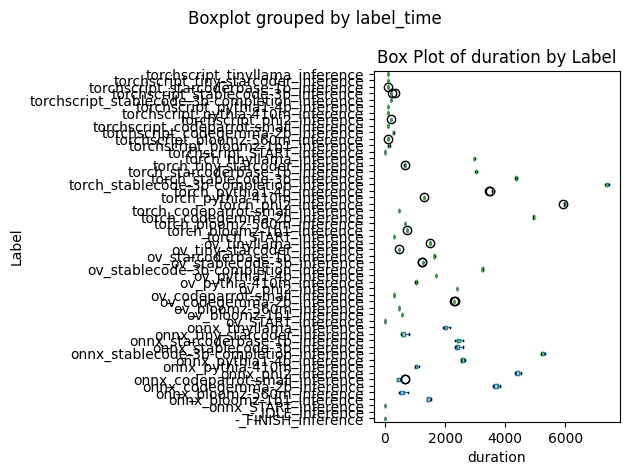

In [125]:

combined_df = time_df
# Assuming combined_df is already created and contains the data

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)


# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(20, 6))
    # Setting vert=False makes the box plots horizontal
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False)]
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False) & combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    plot_df.boxplot(column=variable, by='label_time', grid=False, vert=False) #df[df['A'].notna()]
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.ylabel('Label')
    plt.yticks(rotation=0)  # Rotate label ticks if necessary
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.xlim([0,20])
    #plt.savefig(path+"duration_runall")
plt.show()


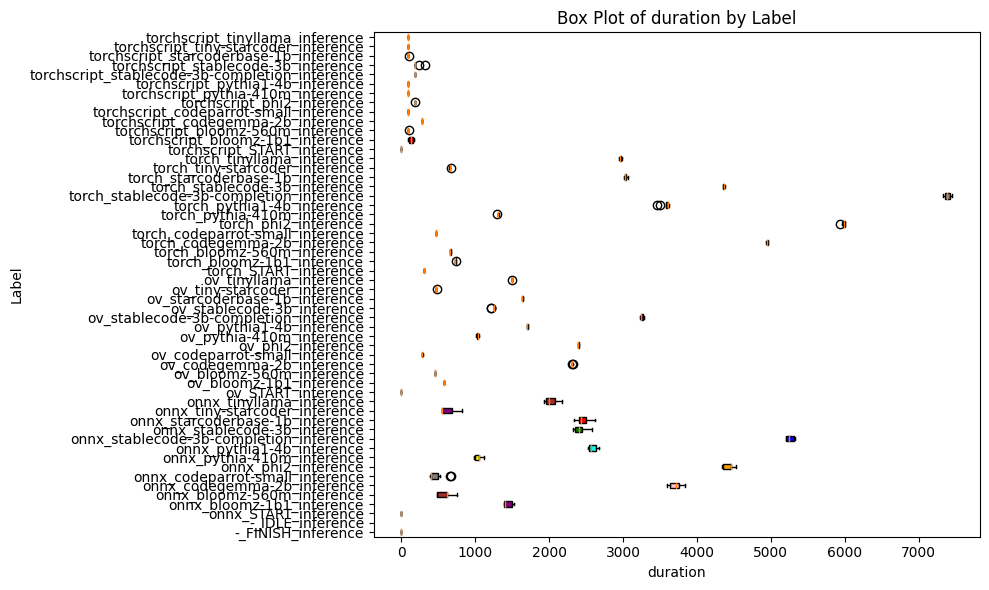

In [126]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.tight_layout()  # Adjust layout to make room for labels

plt.show()


In [127]:
#condition = time_df['label'].str.endswith('phi2')

#time_plot = remove_condition_rows( condition, time_df)
time_plot = time_df

time_plot

time runtime           model engine  \
0     2024-06-12 02:19:20.000000       -            IDLE    NaN   
1     2024-06-12 02:24:20.000000   torch           START    NaN   
2     2024-06-12 02:24:21.358228     NaN             NaN  torch   
3     2024-06-12 02:24:23.215555     NaN             NaN  torch   
4     2024-06-12 03:22:07.000000   torch      pythia1-4b    NaN   
...                          ...     ...             ...    ...   
1695  2024-11-23 17:13:10.000000      ov    codegemma-2b    NaN   
1696  2024-11-23 17:13:11.519873     NaN             NaN     ov   
1697  2024-11-23 17:13:12.482244     NaN             NaN     ov   
1698  2024-11-23 17:21:03.000000      ov  tiny-starcoder    NaN   
1699  2024-11-23 17:21:03.000000       -          FINISH    NaN   

          model_name  start_end        file              label     duration  \
0                NaN        NaN      runall               idle          NaN   
1                NaN        NaN      runall        torch_START   300.000000   
2         pythia1-4b        1.0  load_times   torch_pythia1-4b     1.358228   
3         pythia1-4b        0.0  load_times   torch_pythia1-4b     1.857327   
4                NaN        NaN      runall   torch_pythia1-4b  3463.784445   
...              ...        ...         ...                ...          ...   
1695             NaN        NaN      runall    ov_codegemma-2b  2310.766151   
1696  tiny-starcoder        1.0  load_times  ov_tiny-starcoder     1.519873   
1697  tiny-starcoder        0.0  load_times  ov_tiny-starcoder     0.962371   
1698             NaN        NaN      runall  ov_tiny-starcoder   470.517756   
1699             NaN        NaN      runall             finish     0.000000   

                       label_time  experiment  
0                -_IDLE_inference           1  
1           torch_START_inference           1  
2                             NaN           1  
3           torch_pythia1-4b_load           1  
4      torch_pythia1-4b_inference           1  
...                           ...         ...  
1695    ov_codegemma-2b_inference           9  
1696                          NaN           9  
1697       ov_tiny-starcoder_load           9  
1698  ov_tiny-starcoder_inference           9  
1699           -_FINISH_inference           9  

[1700 rows x 11 columns]

In [128]:
condition = time_plot['label'].str.startswith('-')
#remove_condition_rows( condition, energi_df)
#energi_df = energi_df[~condition]
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('idle')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('finish')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.endswith('START')
time_plot = remove_condition_rows( condition, time_plot)

time_plot

time runtime           model engine  \
2     2024-06-12 02:24:21.358228     NaN             NaN  torch   
3     2024-06-12 02:24:23.215555     NaN             NaN  torch   
4     2024-06-12 03:22:07.000000   torch      pythia1-4b    NaN   
5     2024-06-12 03:22:08.738740     NaN             NaN  torch   
6     2024-06-12 03:22:10.319956     NaN             NaN  torch   
...                          ...     ...             ...    ...   
1694  2024-11-23 16:34:39.233849     NaN             NaN     ov   
1695  2024-11-23 17:13:10.000000      ov    codegemma-2b    NaN   
1696  2024-11-23 17:13:11.519873     NaN             NaN     ov   
1697  2024-11-23 17:13:12.482244     NaN             NaN     ov   
1698  2024-11-23 17:21:03.000000      ov  tiny-starcoder    NaN   

          model_name  start_end        file              label     duration  \
2         pythia1-4b        1.0  load_times   torch_pythia1-4b     1.358228   
3         pythia1-4b        0.0  load_times   torch_pythia1-4b     1.857327   
4                NaN        NaN      runall   torch_pythia1-4b  3463.784445   
5          tinyllama        1.0  load_times    torch_tinyllama     1.738740   
6          tinyllama        0.0  load_times    torch_tinyllama     1.581216   
...              ...        ...         ...                ...          ...   
1694    codegemma-2b        0.0  load_times    ov_codegemma-2b     1.414712   
1695             NaN        NaN      runall    ov_codegemma-2b  2310.766151   
1696  tiny-starcoder        1.0  load_times  ov_tiny-starcoder     1.519873   
1697  tiny-starcoder        0.0  load_times  ov_tiny-starcoder     0.962371   
1698             NaN        NaN      runall  ov_tiny-starcoder   470.517756   

                       label_time  experiment  
2                             NaN           1  
3           torch_pythia1-4b_load           1  
4      torch_pythia1-4b_inference           1  
5                             NaN           1  
6            torch_tinyllama_load           1  
...                           ...         ...  
1694         ov_codegemma-2b_load           9  
1695    ov_codegemma-2b_inference           9  
1696                          NaN           9  
1697       ov_tiny-starcoder_load           9  
1698  ov_tiny-starcoder_inference           9  

[1440 rows x 11 columns]

In [129]:
time_inference_df = time_plot[ time_plot['label_time'].str.endswith('inference', na=False) ]
print(len(time_inference_df))
time_inference_df

480


time      runtime                     model  \
4     2024-06-12 03:22:07.000000        torch                pythia1-4b   
7     2024-06-12 04:11:22.000000        torch                 tinyllama   
10    2024-06-12 04:19:16.000000        torch          codeparrot-small   
13    2024-06-12 04:40:51.000000        torch               pythia-410m   
16    2024-06-12 06:19:50.000000        torch                      phi2   
...                          ...          ...                       ...   
1685  2024-11-23 15:38:20.000000  torchscript              codegemma-2b   
1688  2024-11-23 15:39:57.000000  torchscript            tiny-starcoder   
1692  2024-11-23 16:34:37.000000           ov  stablecode-3b-completion   
1695  2024-11-23 17:13:10.000000           ov              codegemma-2b   
1698  2024-11-23 17:21:03.000000           ov            tiny-starcoder   

     engine model_name  start_end    file                        label  \
4       NaN        NaN        NaN  runall             torch_pythia1-4b   
7       NaN        NaN        NaN  runall              torch_tinyllama   
10      NaN        NaN        NaN  runall       torch_codeparrot-small   
13      NaN        NaN        NaN  runall            torch_pythia-410m   
16      NaN        NaN        NaN  runall                   torch_phi2   
...     ...        ...        ...     ...                          ...   
1685    NaN        NaN        NaN  runall     torchscript_codegemma-2b   
1688    NaN        NaN        NaN  runall   torchscript_tiny-starcoder   
1692    NaN        NaN        NaN  runall  ov_stablecode-3b-completion   
1695    NaN        NaN        NaN  runall              ov_codegemma-2b   
1698    NaN        NaN        NaN  runall            ov_tiny-starcoder   

         duration                             label_time  experiment  
4     3463.784445             torch_pythia1-4b_inference           1  
7     2951.680044              torch_tinyllama_inference           1  
10     472.671935       torch_codeparrot-small_inference           1  
13    1293.560613            torch_pythia-410m_inference           1  
16    5934.051351                   torch_phi2_inference           1  
...           ...                                    ...         ...  
1685   283.368844     torchscript_codegemma-2b_inference           9  
1688    94.225242   torchscript_tiny-starcoder_inference           9  
1692  3275.515503  ov_stablecode-3b-completion_inference           9  
1695  2310.766151              ov_codegemma-2b_inference           9  
1698   470.517756            ov_tiny-starcoder_inference           9  

[480 rows x 11 columns]

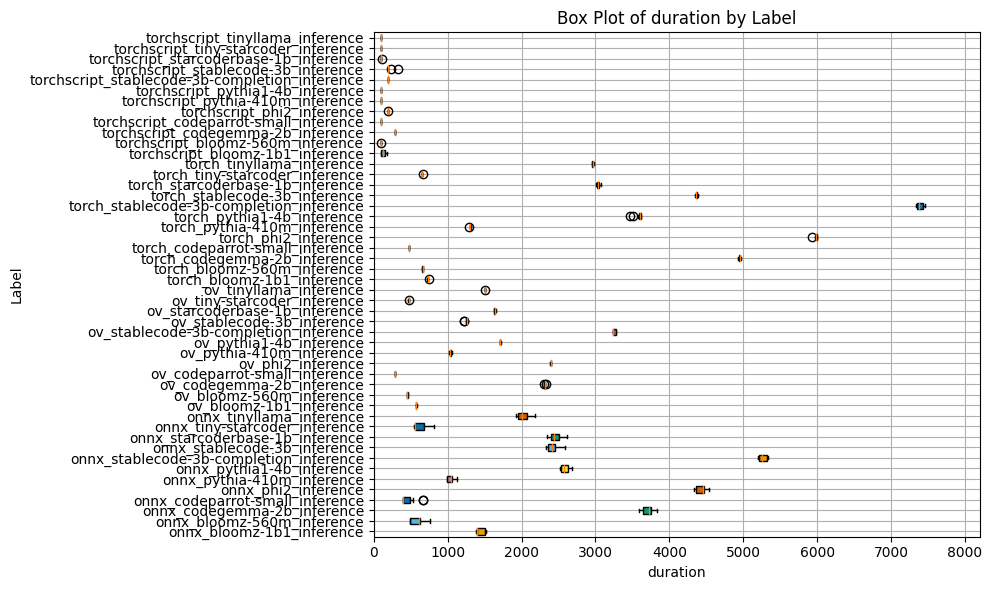

In [130]:

#combined_df = time_plot

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    #plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = time_inference_df
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,combined_df['duration'].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+ "duration_marks.png") if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [131]:
time_inference_df.head()

time runtime             model engine model_name  \
4   2024-06-12 03:22:07.000000   torch        pythia1-4b    NaN        NaN   
7   2024-06-12 04:11:22.000000   torch         tinyllama    NaN        NaN   
10  2024-06-12 04:19:16.000000   torch  codeparrot-small    NaN        NaN   
13  2024-06-12 04:40:51.000000   torch       pythia-410m    NaN        NaN   
16  2024-06-12 06:19:50.000000   torch              phi2    NaN        NaN   

    start_end    file                   label     duration  \
4         NaN  runall        torch_pythia1-4b  3463.784445   
7         NaN  runall         torch_tinyllama  2951.680044   
10        NaN  runall  torch_codeparrot-small   472.671935   
13        NaN  runall       torch_pythia-410m  1293.560613   
16        NaN  runall              torch_phi2  5934.051351   

                          label_time  experiment  
4         torch_pythia1-4b_inference           1  
7          torch_tinyllama_inference           1  
10  torch_codeparrot-small_inference           1  
13       torch_pythia-410m_inference           1  
16              torch_phi2_inference           1

In [132]:
time_inference_df = time_inference_df[['label','experiment','duration',]]
time_inference_df

label  experiment     duration
4                torch_pythia1-4b           1  3463.784445
7                 torch_tinyllama           1  2951.680044
10         torch_codeparrot-small           1   472.671935
13              torch_pythia-410m           1  1293.560613
16                     torch_phi2           1  5934.051351
...                           ...         ...          ...
1685     torchscript_codegemma-2b           9   283.368844
1688   torchscript_tiny-starcoder           9    94.225242
1692  ov_stablecode-3b-completion           9  3275.515503
1695              ov_codegemma-2b           9  2310.766151
1698            ov_tiny-starcoder           9   470.517756

[480 rows x 3 columns]

In [133]:
time_inference_df.to_csv(tables_dir+'final_inference_time_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [134]:
time_inference_df = time_inference_df.drop(columns = ['experiment'])

In [135]:
# Calculate mean values for each label
df = time_inference_df
median_time_inference = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_time_inference.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_time_inference

label     duration
0                        onnx_bloomz-1b1  1399.077517
1                       onnx_bloomz-560m   615.157070
2                      onnx_codegemma-2b  3721.251812
3                  onnx_codeparrot-small   400.491458
4                              onnx_phi2  4454.560860
5                       onnx_pythia-410m  1051.423814
6                        onnx_pythia1-4b  2570.591944
7                     onnx_stablecode-3b  2408.908307
8          onnx_stablecode-3b-completion  5248.014793
9                  onnx_starcoderbase-1b  2432.799547
10                   onnx_tiny-starcoder   553.298955
11                        onnx_tinyllama  2000.845365
12                         ov_bloomz-1b1   575.626701
13                        ov_bloomz-560m   455.812262
14                       ov_codegemma-2b  2311.134276
15                   ov_codeparrot-small   285.900419
16                               ov_phi2  2393.867481
17                        ov_pythia-410m  1032.987605
18                         ov_pythia1-4b  1705.546433
19                      ov_stablecode-3b  1255.660878
20           ov_stablecode-3b-completion  3239.888109
21                   ov_starcoderbase-1b  1638.812340
22                     ov_tiny-starcoder   471.721639
23                          ov_tinyllama  1500.745790
24                      torch_bloomz-1b1   731.558769
25                     torch_bloomz-560m   660.673025
26                    torch_codegemma-2b  4951.058533
27                torch_codeparrot-small   472.177037
28                            torch_phi2  5983.522681
29                     torch_pythia-410m  1306.998445
30                      torch_pythia1-4b  3606.597118
31                   torch_stablecode-3b  4361.323101
32        torch_stablecode-3b-completion  7379.742725
33                torch_starcoderbase-1b  3033.011820
34                  torch_tiny-starcoder   653.241736
35                       torch_tinyllama  2963.893108
36                torchscript_bloomz-1b1   126.630456
37               torchscript_bloomz-560m    94.503039
38              torchscript_codegemma-2b   284.050056
39          torchscript_codeparrot-small    94.470121
40                      torchscript_phi2   189.110978
41               torchscript_pythia-410m    94.378959
42                torchscript_pythia1-4b    96.136919
43             torchscript_stablecode-3b   189.502283
44  torchscript_stablecode-3b-completion   189.344419
45          torchscript_starcoderbase-1b    94.541675
46            torchscript_tiny-starcoder    94.426299
47                 torchscript_tinyllama    94.712955

In [136]:
# Split the 'label' column into 'runtime' and 'model'
median_time_inference[['runtime', 'model']] = median_time_inference['label'].str.split('_', n=1, expand=True)
median_time_inference

label     duration      runtime  \
0                        onnx_bloomz-1b1  1399.077517         onnx   
1                       onnx_bloomz-560m   615.157070         onnx   
2                      onnx_codegemma-2b  3721.251812         onnx   
3                  onnx_codeparrot-small   400.491458         onnx   
4                              onnx_phi2  4454.560860         onnx   
5                       onnx_pythia-410m  1051.423814         onnx   
6                        onnx_pythia1-4b  2570.591944         onnx   
7                     onnx_stablecode-3b  2408.908307         onnx   
8          onnx_stablecode-3b-completion  5248.014793         onnx   
9                  onnx_starcoderbase-1b  2432.799547         onnx   
10                   onnx_tiny-starcoder   553.298955         onnx   
11                        onnx_tinyllama  2000.845365         onnx   
12                         ov_bloomz-1b1   575.626701           ov   
13                        ov_bloomz-560m   455.812262           ov   
14                       ov_codegemma-2b  2311.134276           ov   
15                   ov_codeparrot-small   285.900419           ov   
16                               ov_phi2  2393.867481           ov   
17                        ov_pythia-410m  1032.987605           ov   
18                         ov_pythia1-4b  1705.546433           ov   
19                      ov_stablecode-3b  1255.660878           ov   
20           ov_stablecode-3b-completion  3239.888109           ov   
21                   ov_starcoderbase-1b  1638.812340           ov   
22                     ov_tiny-starcoder   471.721639           ov   
23                          ov_tinyllama  1500.745790           ov   
24                      torch_bloomz-1b1   731.558769        torch   
25                     torch_bloomz-560m   660.673025        torch   
26                    torch_codegemma-2b  4951.058533        torch   
27                torch_codeparrot-small   472.177037        torch   
28                            torch_phi2  5983.522681        torch   
29                     torch_pythia-410m  1306.998445        torch   
30                      torch_pythia1-4b  3606.597118        torch   
31                   torch_stablecode-3b  4361.323101        torch   
32        torch_stablecode-3b-completion  7379.742725        torch   
33                torch_starcoderbase-1b  3033.011820        torch   
34                  torch_tiny-starcoder   653.241736        torch   
35                       torch_tinyllama  2963.893108        torch   
36                torchscript_bloomz-1b1   126.630456  torchscript   
37               torchscript_bloomz-560m    94.503039  torchscript   
38              torchscript_codegemma-2b   284.050056  torchscript   
39          torchscript_codeparrot-small    94.470121  torchscript   
40                      torchscript_phi2   189.110978  torchscript   
41               torchscript_pythia-410m    94.378959  torchscript   
42                torchscript_pythia1-4b    96.136919  torchscript   
43             torchscript_stablecode-3b   189.502283  torchscript   
44  torchscript_stablecode-3b-completion   189.344419  torchscript   
45          torchscript_starcoderbase-1b    94.541675  torchscript   
46            torchscript_tiny-starcoder    94.426299  torchscript   
47                 torchscript_tinyllama    94.712955  torchscript   

                       model  
0                 bloomz-1b1  
1                bloomz-560m  
2               codegemma-2b  
3           codeparrot-small  
4                       phi2  
5                pythia-410m  
6                 pythia1-4b  
7              stablecode-3b  
8   stablecode-3b-completion  
9           starcoderbase-1b  
10            tiny-starcoder  
11                 tinyllama  
12                bloomz-1b1  
13               bloomz-560m  
14              codegemma-2b  
15          codeparrot-small  
16                      phi2  
17               pythia-410m  
18             

In [137]:
new_order= list(median_time_inference.columns[-2:]) + list(median_time_inference.columns[:-2])
# Reorder the columns by indexing in the new order
median_time_inference = median_time_inference[new_order]
median_time_inference

runtime                     model  \
0          onnx                bloomz-1b1   
1          onnx               bloomz-560m   
2          onnx              codegemma-2b   
3          onnx          codeparrot-small   
4          onnx                      phi2   
5          onnx               pythia-410m   
6          onnx                pythia1-4b   
7          onnx             stablecode-3b   
8          onnx  stablecode-3b-completion   
9          onnx          starcoderbase-1b   
10         onnx            tiny-starcoder   
11         onnx                 tinyllama   
12           ov                bloomz-1b1   
13           ov               bloomz-560m   
14           ov              codegemma-2b   
15           ov          codeparrot-small   
16           ov                      phi2   
17           ov               pythia-410m   
18           ov                pythia1-4b   
19           ov             stablecode-3b   
20           ov  stablecode-3b-completion   
21           ov          starcoderbase-1b   
22           ov            tiny-starcoder   
23           ov                 tinyllama   
24        torch                bloomz-1b1   
25        torch               bloomz-560m   
26        torch              codegemma-2b   
27        torch          codeparrot-small   
28        torch                      phi2   
29        torch               pythia-410m   
30        torch                pythia1-4b   
31        torch             stablecode-3b   
32        torch  stablecode-3b-completion   
33        torch          starcoderbase-1b   
34        torch            tiny-starcoder   
35        torch                 tinyllama   
36  torchscript                bloomz-1b1   
37  torchscript               bloomz-560m   
38  torchscript              codegemma-2b   
39  torchscript          codeparrot-small   
40  torchscript                      phi2   
41  torchscript               pythia-410m   
42  torchscript                pythia1-4b   
43  torchscript             stablecode-3b   
44  torchscript  stablecode-3b-completion   
45  torchscript          starcoderbase-1b   
46  torchscript            tiny-starcoder   
47  torchscript                 tinyllama   

                                   label     duration  
0                        onnx_bloomz-1b1  1399.077517  
1                       onnx_bloomz-560m   615.157070  
2                      onnx_codegemma-2b  3721.251812  
3                  onnx_codeparrot-small   400.491458  
4                              onnx_phi2  4454.560860  
5                       onnx_pythia-410m  1051.423814  
6                        onnx_pythia1-4b  2570.591944  
7                     onnx_stablecode-3b  2408.908307  
8          onnx_stablecode-3b-completion  5248.014793  
9                  onnx_starcoderbase-1b  2432.799547  
10                   onnx_tiny-starcoder   553.298955  
11                        onnx_tinyllama  2000.845365  
12                         ov_bloomz-1b1   575.626701  
13                        ov_bloomz-560m   455.812262  
14                       ov_codegemma-2b  2311.134276  
15                   ov_codeparrot-small   285.900419  
16                               ov_phi2  2393.867481  
17                        ov_pythia-410m  1032.987605  
18                         ov_pythia1-4b  1705.546433  
19                      ov_stablecode-3b  1255.660878  
20           ov_stablecode-3b-completion  3239.888109  
21                   ov_starcoderbase-1b  1638.812340  
22                     ov_tiny-starcoder   471.721639  
23                          ov_tinyllama  1500.745790  
24                      torch_bloomz-1b1   731.558769  
25                     torch_bloomz-560m   660.673025  
26                    torch_codegemma-2b  4951.058533  
27                torch_codeparrot-small   472.177037  
28                            torch_phi2  5983.522681  
29                     torch_pythia-410m  1306.998445  
30                      torch_pythia1-4b  3606.597118  
31        

In [138]:
median_time_inference.to_csv(tables_dir+'median_time_inference.csv', index=False)  if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


In [139]:
median_time_inference = median_time_inference.drop(columns = ['label'])

In [140]:
filename = tables_dir + 'median_time_inference.tex'
save_latex_table(median_time_inference,filename)

\begin{tabular}{llr}
\toprule
runtime & model & duration \\
\midrule
onnx & bloomz-1b1 & 1399.077517 \\
onnx & bloomz-560m & 615.157070 \\
onnx & codegemma-2b & 3721.251812 \\
onnx & codeparrot-small & 400.491458 \\
onnx & phi2 & 4454.560860 \\
onnx & pythia-410m & 1051.423814 \\
onnx & pythia1-4b & 2570.591944 \\
onnx & stablecode-3b & 2408.908307 \\
onnx & stablecode-3b-completion & 5248.014793 \\
onnx & starcoderbase-1b & 2432.799547 \\
onnx & tiny-starcoder & 553.298955 \\
onnx & tinyllama & 2000.845365 \\
ov & bloomz-1b1 & 575.626701 \\
ov & bloomz-560m & 455.812262 \\
ov & codegemma-2b & 2311.134276 \\
ov & codeparrot-small & 285.900419 \\
ov & phi2 & 2393.867481 \\
ov & pythia-410m & 1032.987605 \\
ov & pythia1-4b & 1705.546433 \\
ov & stablecode-3b & 1255.660878 \\
ov & stablecode-3b-completion & 3239.888109 \\
ov & starcoderbase-1b & 1638.812340 \\
ov & tiny-starcoder & 471.721639 \\
ov & tinyllama & 1500.745790 \\
torch & bloomz-1b1 & 731.558769 \\
torch & bloomz-560m & 660.6